# **Online Retail Data Analysis with Python**



## Objective

The primary objective of this project is to explore and analyze transactional data from an online retail store. This dataset includes details about customer purchases, such as product information, quantities, prices, and timestamps. 

**Goals:**
1. **Sales Trends:** Identify key sales trends over time, including peak sales months and periods of high customer activity.
2. **Customer Behavior:** Understand customer purchasing behavior, preferences, and patterns.
3. **Popular Products:** Determine the most popular products based on sales volume and revenue.
4. **Outliers and Correlations:** Detect any outliers and identify correlations within the data.
5. **Data-Driven Recommendations:** Provide actionable recommendations to optimize the store's operations and improve customer satisfaction.

**Approach:**
1. **Exploratory Data Analysis (EDA):** Perform EDA to identify patterns, trends, and anomalies in the data.
2. **Visualizations:** Use data visualizations to uncover key trends and make the data more accessible and understandable.
3. **Statistical Analysis:** Apply statistical methods to analyze correlations and quantify relationships within the data.
4. **Strategic Insights:** Extract insights to inform strategic business decisions and enhance the store's overall performance.

**Outcome:**
The insights gained from this analysis will drive strategic business decisions, optimize operations, and improve customer satisfaction, enhancing the store's competitiveness in the online retail market.


## Dataset

This data file is already, 
downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

#### Note : The steps above are not carried out sequentially.

## Task 1: Load the Data

In [45]:
# your code here
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns',None)

In [3]:
#plt.style.available
plt.style.use('seaborn-notebook')

In [4]:
# load
df = pd.read_excel(r"Online Retail.xlsx")

In [5]:
# top 10
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.00,United Kingdom


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
# sorted columns 
df = df[['CustomerID','InvoiceNo', 'InvoiceDate', 'Country', 'StockCode', 'Description', 'Quantity' ,
       'UnitPrice']]

In [8]:
df.sample()

,CustomerID,InvoiceNo,InvoiceDate,Country,StockCode,Description,Quantity,UnitPrice
404751,16730.00,571684,2011-10-18 14:11:00,United Kingdom,21034,REX CASH+CARRY JUMBO SHOPPER,1,0.95


#### **Dataset info**

In [9]:
# Shape
df.shape

(541909, 8)

In [10]:
print(f"Number of Rows    : {df.shape[0]}")
print(f"Number of Columns : {df.shape[1]}")

Number of Rows    : 541909
Number of Columns : 8


In [11]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   406829 non-null  float64       
 1   InvoiceNo    541909 non-null  object        
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   Country      541909 non-null  object        
 4   StockCode    541909 non-null  object        
 5   Description  540455 non-null  object        
 6   Quantity     541909 non-null  int64         
 7   UnitPrice    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# Data types 
df.dtypes

CustomerID            float64
InvoiceNo              object
InvoiceDate    datetime64[ns]
Country                object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
dtype: object

## Task 2: Data Cleaning

In [13]:
# find duplicate data
df.duplicated().sum()

5268

In [14]:
df.loc[df.duplicated(keep=False)]

,CustomerID,InvoiceNo,InvoiceDate,Country,StockCode,Description,Quantity,UnitPrice
485,17908.00,536409,2010-12-01 11:45:00,United Kingdom,22111,SCOTTIE DOG HOT WATER BOTTLE,1,4.95
489,17908.00,536409,2010-12-01 11:45:00,United Kingdom,22866,HAND WARMER SCOTTY DOG DESIGN,1,2.10
494,17908.00,536409,2010-12-01 11:45:00,United Kingdom,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25
517,17908.00,536409,2010-12-01 11:45:00,United Kingdom,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25
521,17908.00,536409,2010-12-01 11:45:00,United Kingdom,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2.95
...,...,...,...,...,...,...,...,...
541675,14446.00,581538,2011-12-09 11:34:00,United Kingdom,22068,BLACK PIRATE TREASURE CHEST,1,0.39
541689,14446.00,581538,2011-12-09 11:34:00,United Kingdom,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2.49
541692,14446.00,581538,2011-12-09 11:34:00,United Kingdom,22992,REVOLVER WOODEN RULER,1,1.95
541699,14446.00,581538,2011-12-09 11:34:00,United Kingdom,22694,WICKER STAR,1,2.10


In [15]:
# Drop Duplicates
df = df.drop_duplicates(keep='last').reset_index(drop=True)

In [16]:
df.shape

(536641, 8)

In [17]:
print(f" Before (541909) - After (536641) = {541909-536641} duplicate values removed.")

 Before (541909) - After (536641) = 5268 duplicate values removed.


In [18]:
# find null values
df.isna().sum()

CustomerID     135037
InvoiceNo           0
InvoiceDate         0
Country             0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
dtype: int64

In [19]:
df.loc[df.isna().any(axis=1)].head(5)

,CustomerID,InvoiceNo,InvoiceDate,Country,StockCode,Description,Quantity,UnitPrice
605,nan,536414,2010-12-01 11:52:00,United Kingdom,22139,NaN,56,0.00
1407,nan,536544,2010-12-01 14:32:00,United Kingdom,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51
1408,nan,536544,2010-12-01 14:32:00,United Kingdom,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51
1409,nan,536544,2010-12-01 14:32:00,United Kingdom,21786,POLKADOT RAIN HAT,4,0.85
1410,nan,536544,2010-12-01 14:32:00,United Kingdom,21787,RAIN PONCHO RETROSPOT,2,1.66
...,...,...,...,...,...,...,...,...
536275,nan,581498,2011-12-09 10:26:00,United Kingdom,85099B,JUMBO BAG RED RETROSPOT,5,4.13
536276,nan,581498,2011-12-09 10:26:00,United Kingdom,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,4.13
536277,nan,581498,2011-12-09 10:26:00,United Kingdom,85150,LADIES & GENTLEMEN METAL SIGN,1,4.96
536278,nan,581498,2011-12-09 10:26:00,United Kingdom,85174,S/4 CACTI CANDLES,1,10.79


In [20]:
df.loc[df.isna().any(axis=1)]['InvoiceNo'].value_counts().head(5)

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
566327       1
566325       1
566324       1
566323       1
540673       1
Name: InvoiceNo, Length: 3710, dtype: int64

In [22]:
# Assign to new variable
clean_df = df.copy()
clean_df = clean_df.dropna()

In [23]:
clean_df.head(5)

,CustomerID,InvoiceNo,InvoiceDate,Country,StockCode,Description,Quantity,UnitPrice
0,17850.00,536365,2010-12-01 08:26:00,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.00,536365,2010-12-01 08:26:00,United Kingdom,71053,WHITE METAL LANTERN,6,3.39
2,17850.00,536365,2010-12-01 08:26:00,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.00,536365,2010-12-01 08:26:00,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.00,536365,2010-12-01 08:26:00,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39
...,...,...,...,...,...,...,...,...
536636,12680.00,581587,2011-12-09 12:50:00,France,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85
536637,12680.00,581587,2011-12-09 12:50:00,France,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10
536638,12680.00,581587,2011-12-09 12:50:00,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15
536639,12680.00,581587,2011-12-09 12:50:00,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15


In [24]:
# check again
print(f"Duplicated : {clean_df.duplicated().sum()}")
print(f"Null Values : {clean_df.isna().sum().sum()}")

Duplicated : 0
Null Values : 0


## Task 3: Descriptive Statistics

In [25]:
# Describe numerical variable
clean_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
CustomerID,401604.00,15281.16,1714.01,12346.00,13939.00,15145.00,16784.00,18287.00
Quantity,401604.00,12.18,250.28,-80995.00,2.00,5.00,12.00,80995.00
UnitPrice,401604.00,3.47,69.76,0.00,1.25,1.95,3.75,38970.00


**For the CustomerID column:**

The total number of entries recorded is **401,604**. The **average** CustomerID is **15,281.16**, with a **standard deviation** of **1,714.01**. The **minimum** CustomerID value is **12,346**, the **first quartile (25%)** is **13,939**, the **median (50%)** is **15,145**, the **third quartile (75%)** is **16,784**, and the **maximum** CustomerID value is **18,287**.

**For the Quantity column:**

The total number of entries recorded is **536,641**. The **average** Quantity is **9.62**, with a **standard deviation** of **219.13**. The **minimum** Quantity value is **-80,995**, the **first quartile (25%)** is **1**, the **median (50%)** is **3**, the **third quartile (75%)** is **10**, and the **maximum** Quantity value is **80,995**.

**For the UnitPrice column:**

The total number of entries recorded is **536,641**. The **average** UnitPrice is **4.63**, with a **standard deviation** of **97.23**. The **minimum** UnitPrice value is **-11,062.06**, the **first quartile (25%)** is **1.25**, the **median (50%)** is **2.08**, the **third quartile (75%)** is **4.13**, and the **maximum** UnitPrice value is **38,970.0**.

In [26]:
# describe categorical variable
clean_df.describe(include='O').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
Country,401604,37,United Kingdom,356728
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058



Based on the given data, the total number of recorded `invoices` is **401,604** with **22,190** unique invoices. **The most frequently** occurring invoice has a frequency of **542 times**.

For transactions across different countries, there are a total of **401,604** recorded transactions from **37 unique countries**. The **United Kingdom** is the country with the **highest number of transactions**, which is **356,728 times**.

Regarding the **items sold**, the total number of recorded items is **401,604** with **3,684 unique stock codes**. The **most frequently** occurring stock code is **85123A** with a frequency of **2,065 times**.

For item descriptions, there are **401,604** recorded descriptions with **3,896 unique descriptions**. The **most frequently** occurring item description is **"WHITE HANGING HEART T-LIGHT HOLDER"** with a frequency of **2,058 times**.

In conclusion, the **majority of transactions** are conducted in the **United Kingdom**, with certain **popular items** such as the **"WHITE HANGING HEART T-LIGHT HOLDER"** and stock code **"85123A"**. Additionally, there are several invoices that appear very frequently in the dataset.

In [27]:
# Invoice Date Describe
clean_df[['InvoiceDate']].describe().T

,count,unique,top,freq,first,last
InvoiceDate,401604,20460,2011-11-14 15:27:00,543,2010-12-01 08:26:00,2011-12-09 12:50:00


Based on the given data, there are a total of **401,604** recorded invoice dates with **20,460 unique invoice dates**. The **most frequently** occurring invoice date is **14 November 2011 at 15:27:00**, with a frequency of **543 times**. The **first recorded** invoice date is **1 December 2010 at 08:26:00**, while the **last recorded** invoice date is **9 December 2011 at 12:50:00**.

In [28]:
# Check for negative values in 'Quantity'
clean_df.loc[clean_df['Quantity'] < 0].sort_values(by='Quantity').count()

,CustomerID,InvoiceNo,InvoiceDate,Country,StockCode,Description,Quantity,UnitPrice
535161,16446.00,C581484,2011-12-09 09:27:00,United Kingdom,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2.08
61011,12346.00,C541433,2011-01-18 10:17:00,United Kingdom,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1.04
4226,15838.00,C536757,2010-12-02 14:23:00,United Kingdom,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,0.03
158702,15749.00,C550456,2011-04-18 13:08:00,United Kingdom,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2.10
158701,15749.00,C550456,2011-04-18 13:08:00,United Kingdom,21175,GIN + TONIC DIET METAL SIGN,-2000,1.85
...,...,...,...,...,...,...,...,...
177277,14056.00,C552237,2011-05-06 16:44:00,United Kingdom,22441,GROW YOUR OWN BASIL IN ENAMEL MUG,-1,2.10
347150,12384.00,C567540,2011-09-21 10:00:00,Switzerland,23173,REGENCY TEAPOT ROSES,-1,9.95
177276,14056.00,C552237,2011-05-06 16:44:00,United Kingdom,22380,TOY TIDY SPACEBOY,-1,2.10
345252,15764.00,C567355,2011-09-19 16:16:00,United Kingdom,22960,JAM MAKING SET WITH JARS,-1,4.25


## Task 4: Exploratoy Data Analysis (EDA)

In [29]:
clean_df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
CustomerID,401604.00,NaN,NaN,NaN,NaT,NaT,15281.16,1714.01,12346.00,13939.00,15145.00,16784.00,18287.00
InvoiceNo,401604.00,22190.00,576339.00,542.00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InvoiceDate,401604,20460,2011-11-14 15:27:00,543,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,401604,37,United Kingdom,356728,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,401604,3684,85123A,2065,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,401604.00,NaN,NaN,NaN,NaT,NaT,12.18,250.28,-80995.00,2.00,5.00,12.00,80995.00
UnitPrice,401604.00,NaN,NaN,NaN,NaT,NaT,3.47,69.76,0.00,1.25,1.95,3.75,38970.00


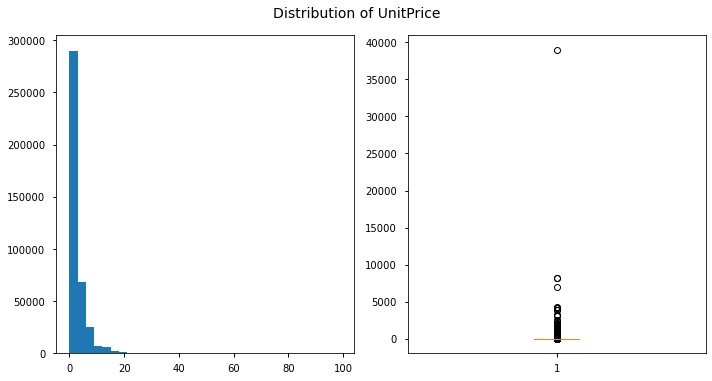

In [134]:
# Distribution of UnitPrice
fig, axes = plt.subplots(1,2, figsize=(10,5))
# histogram
axes[0].hist(clean_df['UnitPrice'],bins=range(0,100,3))
# boxplot
axes[1].boxplot(data=clean_df, x='UnitPrice')

plt.suptitle('Distribution of UnitPrice',y=1.05, fontsize=14 )
plt.tight_layout()
plt.show()

**Histogram Analysis**:

The histogram reveals that most UnitPrice values are clustered at very low levels, with the highest frequency around the 0 to 5 range. The frequency sharply decreases after UnitPrice values exceed 5, with virtually no values beyond 20.

**Boxplot Analysis**:

The boxplot indicates that the median UnitPrice is at a very low value. There are several very high outliers, with UnitPrice values reaching up to around 40,000.The interquartile range (IQR) is very small, showing that most data is concentrated around very low values.

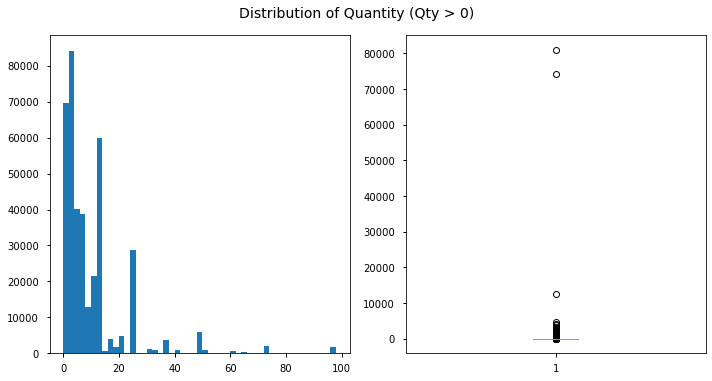

In [135]:
# Distribution of Quantity (>0)
fig, axes = plt.subplots(1,2, figsize=(10,5))
# histogram
axes[0].hist(clean_df.loc[clean_df['Quantity'] > 0, 'Quantity'], bins=range(0,100,2))
# boxplot
axes[1].boxplot(data=clean_df.loc[clean_df['Quantity'] > 0], x='Quantity')

plt.suptitle('Distribution of Quantity (Qty > 0)',y=1.05, fontsize=14 )
plt.tight_layout()
plt.show()

**Histogram Analysis**:

The histogram illustrates the frequency distribution of quantity values.
The x-axis represents quantity values ranging from 0 to 100, and the y-axis represents frequency ranging from 0 to 80,000.
The majority of quantity values are clustered between 0 and 20, with a significant peak around 0-10 and another smaller peak around 10-20. There are very few occurrences of quantity values above 20.

**Box Plot Analysis** :

The box plot provides a summary of the distribution of quantity values. The y-axis represents frequency ranging from 0 to 80,000, and the x-axis has a single category labeled "1".
The box plot shows a concentration of data points at the lower end of the frequency range, with several outliers extending up to the higher frequencies.The majority of data points are concentrated at the lower end, with a few extreme values.

## Task 5: Feature Engineering

#### Create new variable (hour,day,week,month)

In [33]:
# Hour
clean_df['hour'] = clean_df['InvoiceDate'].dt.strftime("%H")
clean_df['hour'] = clean_df['hour'].astype('int')
# Day
clean_df['day'] = clean_df['InvoiceDate'].dt.strftime("%d")
clean_df['day'] = clean_df['day'].astype('int')
# Day Name
clean_df['day_name'] = clean_df['InvoiceDate'].dt.strftime("%A")
# Week 
clean_df['week'] = clean_df['InvoiceDate'].dt.strftime('W-%W')
# Month
clean_df['month'] = clean_df['InvoiceDate'].dt.strftime('%B')

#### Calculate `'UnitPrice' * 'Quantity'`

In [34]:
clean_df['TotalAmount'] = clean_df['UnitPrice'] * clean_df['Quantity']

In [35]:
clean_df.sample(1)

,CustomerID,InvoiceNo,InvoiceDate,Country,StockCode,Description,Quantity,UnitPrice,hour,day,day_name,week,month,TotalAmount
0,17850.00,536365,2010-12-01 08:26:00,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,8,1,Wednesday,W-48,December,15.30
1,17850.00,536365,2010-12-01 08:26:00,United Kingdom,71053,WHITE METAL LANTERN,6,3.39,8,1,Wednesday,W-48,December,20.34
2,17850.00,536365,2010-12-01 08:26:00,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,8,1,Wednesday,W-48,December,22.00
3,17850.00,536365,2010-12-01 08:26:00,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,8,1,Wednesday,W-48,December,20.34
4,17850.00,536365,2010-12-01 08:26:00,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,8,1,Wednesday,W-48,December,20.34


## Task 6: Visualize Different Aspect of Data

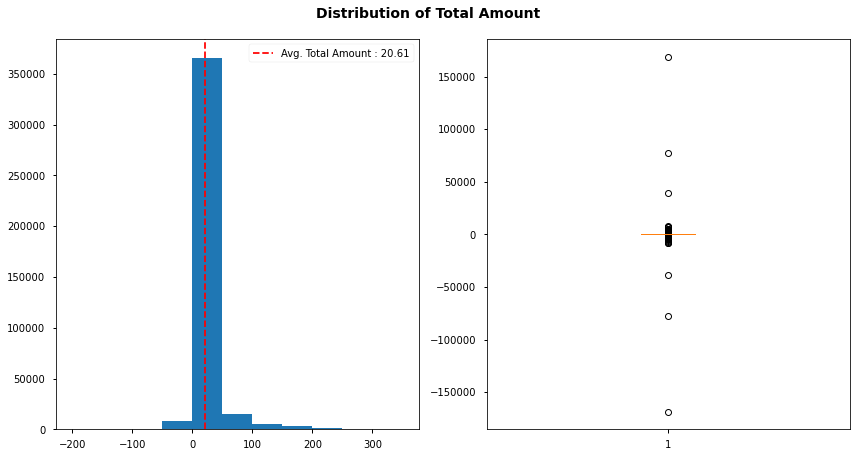

In [144]:
# Distribution of TotalAmount
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].hist(clean_df['TotalAmount'],bins=range(-200,400,50))
axes[0].axvline(clean_df['TotalAmount'].mean(), ls="--", color='red', label=f"Avg. Total Amount : {clean_df['TotalAmount'].mean():.2f}")
axes[0].legend()

axes[1].boxplot(clean_df['TotalAmount'])

plt.suptitle('Distribution of Total Amount',y=1.05, fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

**Histogram Analysis** :

The histogram displays the frequency distribution of total amount values.The x-axis ranges from `~-200 to ~300`, and the y-axis ranges from `0 to 400,000`. The histogram has a very high peak around 0, indicating that most of the data points are concentrated near this value. 

**Box Plot Analysis** :

The box plot shows the spread and outliers of the total amount values. The y-axis ranges from `-150,000 to 150,000`.
The box plot shows a very small interquartile range around 0, with several outliers extending far above and below the main cluster of data points.

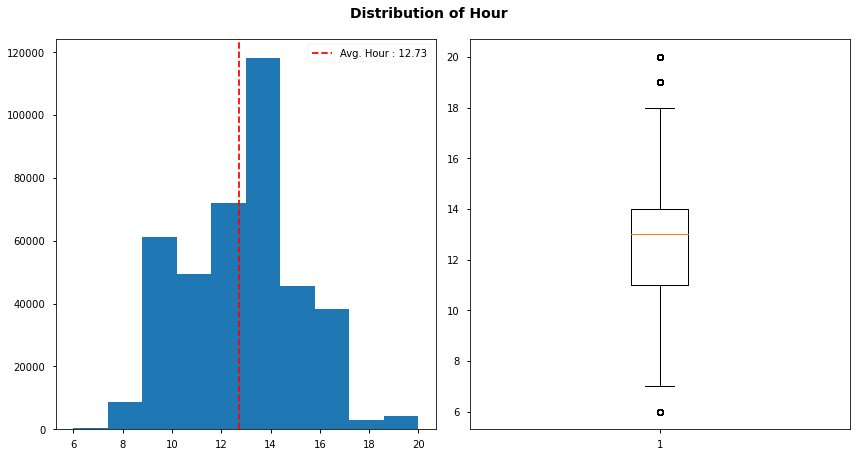

In [37]:
# Distribution of hour
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].hist(clean_df['hour'])
axes[0].axvline(clean_df['hour'].mean(), ls="--", color='red', label='Avg. Hour : 12.73')
axes[0].legend()

axes[1].boxplot(clean_df['hour'])

plt.suptitle('Distribution of Hour',y=1.05, fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

**Based on `Hour` distribution:**

- **Peak Activity Hours**:\
    The data shows that most activities or transactions occur between `10 AM and 2 PM`, with the highest concentration around these hours. This peak period could be critical for staffing, promotions, and inventory management.

- **Average Hour**:\
    The average hour for activities or transactions is approximately `12.73`, aligning well with the peak period identified in the histogram.

- **Median and Interquartile Range**:\
    The median hour is around `13`, and the interquartile range (IQR) spans from `11 to 14`. This indicates that `50%` of the data points fall within this range, providing a clear focus period for key business activities.

- **Outliers**:\
    There are some outliers with activities or transactions occurring before `8 AM and after 6 PM`. These outliers may represent special cases or specific customer behaviors that might require additional analysis.

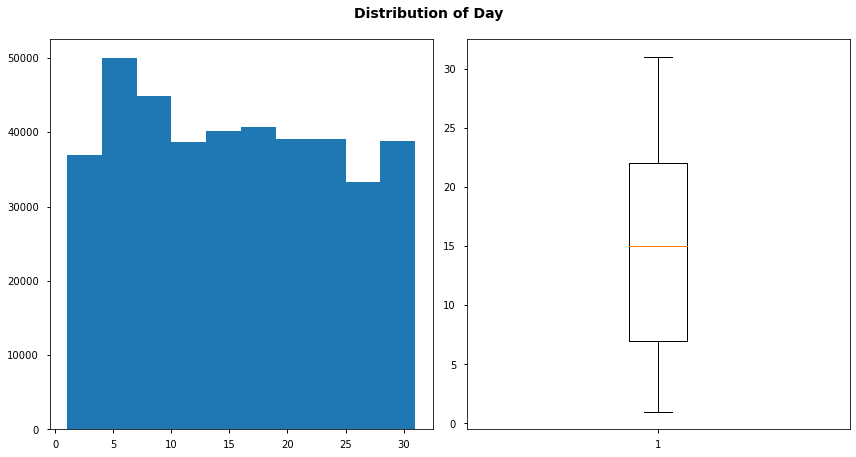

In [38]:
# Distribution of day
fig, axes = plt.subplots(1,2,figsize=(12,6))

axes[0].hist(clean_df['day'])
axes[1].boxplot(clean_df['day'])

plt.suptitle('Distribution of Day',y=1.05, fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

**Based on the `Day` variable distribution**:

- **Uniform Distribution**:\
    The data shows a relatively uniform distribution of activities or transactions throughout the days of the month. This uniformity suggests that there is no specific day that stands out significantly in terms of activity levels.

- **Median and Interquartile Range**:\
    The median day is around the `15th`, and the interquartile range (IQR) spans from the `7th to the 22nd` day of the month. This indicates that 50% of the data points fall within this range, providing a clear focus period for key business activities.

- **Consistency**:\
    The absence of significant outliers suggests that the distribution of activities or transactions is consistent across the days of the month, without any extreme variations.

**Recommendations :**
- **Balanced Resource Allocation**:\
    Ensure that resources, such as staffing and inventory, are balanced evenly throughout the month to accommodate the relatively uniform distribution of activities.
- **Consistent Promotions**:\
    Schedule promotions and special offers evenly throughout the month to maintain steady customer engagement and sales.
- **Monitor Trends**:\
    Continuously monitor the distribution of activities to identify any emerging patterns or trends that may require adjustments in resource allocation or promotional strategies.

## Task 7: Analyze the Sales Trends Over Time with Conclusion

### Sales by Day

In [39]:
# Total Sales by Day 
total_sales_day = clean_df.loc[clean_df['Quantity'] > 0]
total_sales_day = total_sales_day.groupby(['day_name'],as_index=False).agg({'Quantity':'sum', 'TotalAmount':'sum'})
total_sales_day.rename(columns={'day_name':'Day','Quantity':'Qty. Order', 'TotalAmount':'Total'},inplace=True)
# Sorted
ordered_day = ['Sunday','Monday','Tuesday', 'Wednesday','Thursday','Friday']
total_sales_day['Day'] = pd.Categorical(total_sales_day['Day'], ordered=True, categories=ordered_day)
total_sales_day = total_sales_day.sort_values(by='Day')

In [40]:
# Feature Engineering
total_sales_day['difference'] = total_sales_day['Total'].diff()
total_sales_day['pct_difference'] = total_sales_day['Total'].pct_change()*100

In [41]:
# Filtering
total_sales_day_negative = clean_df.loc[clean_df['Quantity'] < 0]
total_sales_day_negative = total_sales_day_negative.groupby(['day_name'],as_index=False).agg({'Quantity':'sum', 'TotalAmount':'sum'})
total_sales_day_negative.rename(columns={'day_name':'Day','Quantity':'Qty. Order', 'TotalAmount':'Total'},inplace=True)
# Sorted
total_sales_day_negative['Day'] = pd.Categorical(total_sales_day_negative['Day'], ordered=True, categories=ordered_day)
total_sales_day_negative = total_sales_day_negative.sort_values(by='Day')

In [42]:
display(total_sales_day)
display(total_sales_day_negative)

,Day,Qty. Order,Total,difference,pct_difference
2,Sunday,460984,785490.32,nan,nan
1,Monday,766919,1363604.40,578114.08,73.60
4,Tuesday,1005772,1697733.80,334129.40,24.50
5,Wednesday,960128,1584283.83,-113449.97,-6.68
3,Thursday,1150224,1973015.73,388731.90,24.54
0,Friday,821859,1483080.81,-489934.92,-24.83


,Day,Qty. Order,Total
2,Sunday,-3234,-8077.97
1,Monday,-27316,-92525.80
4,Tuesday,-93691,-135018.12
5,Wednesday,-21885,-57843.83
3,Thursday,-34558,-70699.68
0,Friday,-92351,-244524.07


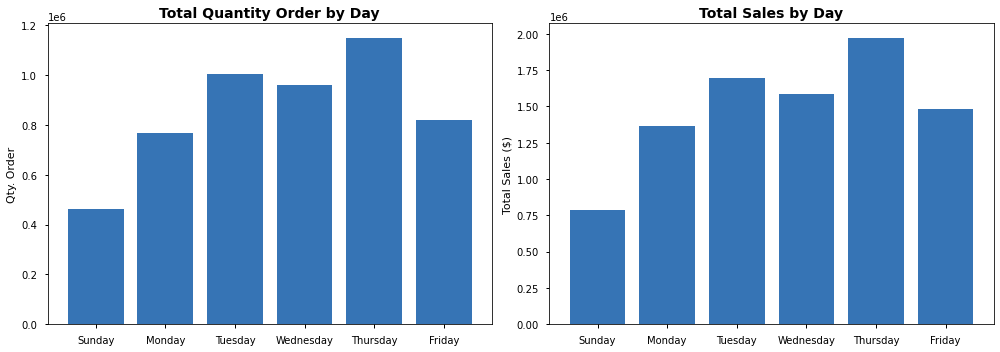

In [46]:
# Sales & Qty by Day
fig, axes= plt.subplots(1,2,figsize=(14,5))
axes[0].bar(x=total_sales_day['Day'],height=total_sales_day['Qty. Order'],color='#3674B5')
#axes[0].plot(total_sales_day['Day'], total_sales_day['Qty. Order'], marker='o',color='#FBA518',linewidth=3)
axes[0].set_ylabel('Qty. Order')
axes[0].set_xlabel(None)
axes[0].set_title('Total Quantity Order by Day',fontsize=14,weight='bold')

axes[1].bar(x=total_sales_day['Day'],height=total_sales_day['Total'],color='#3674B5')
#axes[1].plot(total_sales_day['Day'], total_sales_day['Total'], marker='o',color='#FBA518', linewidth=3)
axes[1].set_ylabel('Total Sales ($)')
axes[1].set_title('Total Sales by Day',fontsize=14,weight='bold')

plt.tight_layout()
plt.show()

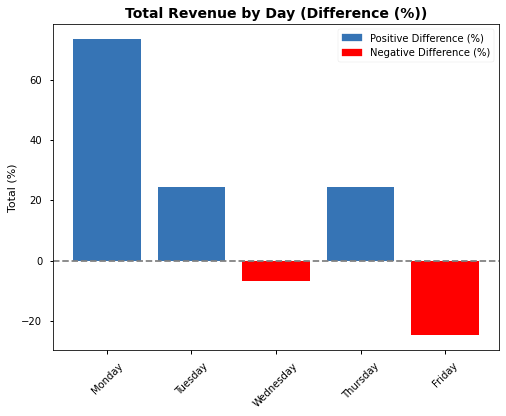

In [47]:
# Revenue by Difference (%)
colors = ['red' if val < 0 else '#3674B5' for val in total_sales_day['pct_difference']]
red_patch = mpatches.Patch(color='red', label='Negative Difference (%)')
blue_patch = mpatches.Patch(color='#3674B5', label='Positive Difference (%)')

fig, axes = plt.subplots(figsize=(8,6))
axes.bar(total_sales_day['Day'],total_sales_day['pct_difference'],color=colors,label='Difference (%)')
axes.axhline(0, ls='--', color='grey',label="Total Amount : 0")
axes.set_title('Total Revenue by Day (Difference (%))',fontsize=14,weight='bold')
axes.set_ylabel('Total (%)')
axes.set_ylim()
axes.tick_params(axis='x',rotation=45)
axes.legend(handles=[blue_patch, red_patch])
plt.show()

#### Conclusion

**Based on the analysis of the daily order quantities and total amounts:**

- **Highest Order Day:**\
Thursday has the highest quantity of orders `(1,150,224)` and the highest total amount `(1,973,015.73)`, indicating a peak in customer activity.

- **Significant Differences:**\
The largest positive difference is observed on **Monday**, with a `73.60%` increase from Sunday. Conversely, the largest negative difference is observed on **Friday**, with a `-24.83%` decrease from Thursday.

- **Peak Activity Days:**\
**Monday, Tuesday, and Thursday** are the days with the **highest** increases in order quantities and total amounts, suggesting these days are critical for business activities.

- **Weekend Trends:**\
**Sunday's** order quantities and total amounts are **the lowest**, which is typical for retail businesses as customer activity tends to be lower on weekends.


**Recommendations :**
- **Resource Allocation:** \
Optimize staffing and inventory levels on **Monday, Tuesday, and Thursday** to handle the peak customer activity efficiently.

- **Targeted Promotions:** \
Schedule promotions and special offers on **Mondays and Thursdays** to maximize customer engagement and sales.

- **Weekend Strategies:** \
Consider implementing weekend promotions or special events to boost customer activity on **Sundays.**

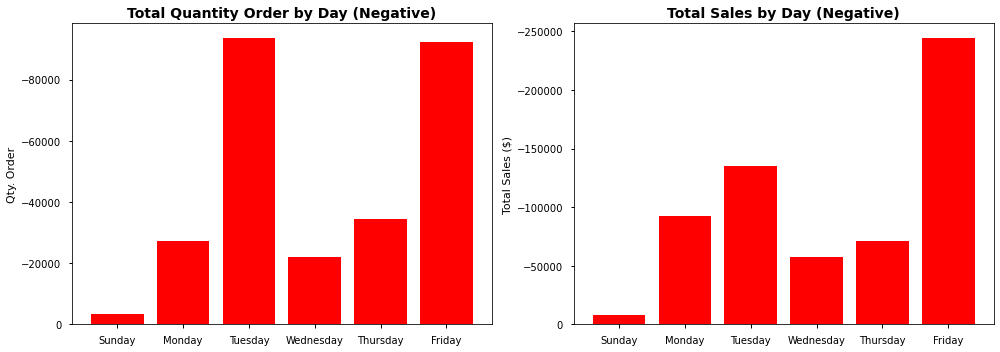

In [48]:
# Sales & Qty by day (Negative) 
fig, axes= plt.subplots(1,2,figsize=(14,5))
axes[0].bar(x=total_sales_day_negative['Day'],height=total_sales_day_negative['Qty. Order'],color='red')
#axes[0].plot(total_sales_day_negative['Day'], total_sales_day_negative['Qty. Order'], marker='o',color='#FBA518',linewidth=3)
axes[0].set_ylabel('Qty. Order')
axes[0].set_title('Total Quantity Order by Day (Negative)',fontsize=14,weight='bold')
axes[0].invert_yaxis()

axes[1].bar(x=total_sales_day_negative['Day'],height=total_sales_day_negative['Total'],color='red')
#axes[1].plot(total_sales_day_negative['Day'], total_sales_day_negative['Total'], marker='o',color='#FBA518', linewidth=3)
axes[1].set_ylabel('Total Sales ($)')
axes[1].set_title('Total Sales by Day (Negative)',fontsize=14,weight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### Conclusion
**Based on the analysis of the negative order quantities and their corresponding total amounts:**

- **Highest Negative Order Day:** \
**Tuesday** has the **highest negative** order quantity `(-93,691)` and the highest negative total amount `(-135,018.12)`, indicating a significant drop in orders and revenue on this day.

- **Significant Negative Trends:** \
**Friday** also shows a **large negative** order quantity `(-92,351)` and the **highest negative total amount** `(-244,524.07)`, making it another critical day to address.

- **Negative Order Patterns:** \
**Monday, Tuesday, and Friday** exhibit the **most significant negative** order quantities and total amounts, suggesting these days may have specific issues affecting order fulfillment and revenue generation.

**Recommendations :**
- **Investigate Causes:**\
Conduct a thorough investigation to identify the underlying causes of the significant negative order quantities and total amounts on **Monday, Tuesday, and Friday**. This may include examining operational inefficiencies, customer complaints, or external factors.

- **Implement Corrective Measures:**\
Based on the investigation results, implement corrective measures to address the identified issues. This may involve optimizing order processing, improving customer service, or revising pricing strategies.

- **Monitor and Adjust:**\
Continuously monitor the order quantities and total amounts to track the effectiveness of the implemented measures. Make necessary adjustments to ensure sustained improvement in order fulfillment and revenue generation.

### Sales by Month

In [49]:
# Total Sales by Month 
# Filtering
total_sales_month = clean_df.loc[clean_df['Quantity'] > 0]
total_sales_month = total_sales_month.groupby(['month'],as_index=False).agg({'Quantity':'sum', 'TotalAmount':'sum'})
total_sales_month.rename(columns={'month':'Month','Quantity':'Qty. Order', 'TotalAmount':'Total'},inplace=True)
# Sorted
ordered_month = ['January','February','March','April','May','June','July','August','September','October','November','December']
total_sales_month['Month'] = pd.Categorical(total_sales_month['Month'], ordered=True, categories=ordered_month)
total_sales_month = total_sales_month.sort_values(by='Month').reset_index(drop=True)

In [50]:
# Feature Engineering
total_sales_month['difference'] = total_sales_month['Total'].diff()
total_sales_month['pct_difference'] = total_sales_month['Total'].pct_change()*100

In [51]:
# Total Sales by Month Negative 
# Filtering
total_sales_month_negative = clean_df.loc[clean_df['Quantity'] < 0]
total_sales_month_negative = total_sales_month_negative.groupby(['month'],as_index=False).agg({'Quantity':'sum', 'TotalAmount':'sum'})
total_sales_month_negative.rename(columns={'month':'Month','Quantity':'Qty. Order', 'TotalAmount':'Total'},inplace=True)
# Sorted
total_sales_month_negative['Month'] = pd.Categorical(total_sales_month_negative['Month'], ordered=True, categories=ordered_month)
total_sales_month_negative = total_sales_month_negative.sort_values(by='Month').reset_index(drop=True)

In [52]:
display(total_sales_month)
display(total_sales_month_negative)

,Month,Qty. Order,Total,difference,pct_difference
0,January,348522,568101.31,nan,nan
1,February,265043,446084.92,-122016.39,-21.48
2,March,347623,594081.76,147996.84,33.18
3,April,291369,468374.33,-125707.43,-21.16
4,May,372948,677355.15,208980.82,44.62
5,June,363014,660046.05,-17309.10,-2.56
6,July,367372,598962.90,-61083.15,-9.25
7,August,398190,644051.04,45088.14,7.53
8,September,543654,950690.20,306639.16,47.61
9,October,591551,1035642.45,84952.25,8.94


,Month,Qty. Order,Total
0,January,-79767,-94369.41
1,February,-2800,-10550.85
2,March,-4528,-15505.55
3,April,-13639,-43151.66
4,May,-5833,-30343.48
5,June,-6775,-53183.53
6,July,-6013,-25850.58
7,August,-12325,-28972.95
8,September,-7304,-21333.97
9,October,-22653,-62336.07


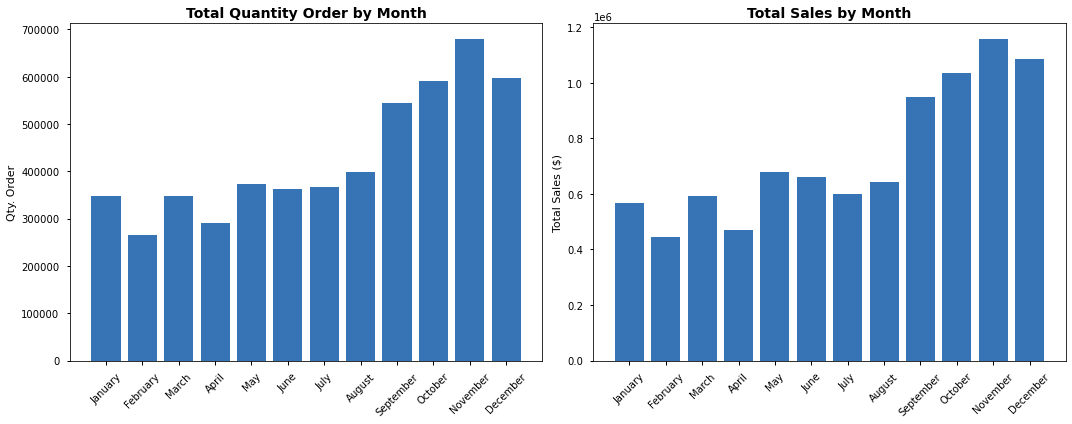

In [53]:
# Sales & Qty by Month
fig, axes= plt.subplots(1,2,figsize=(15,6))
axes[0].bar(x=total_sales_month['Month'],height=total_sales_month['Qty. Order'],color='#3674B5')
#axes[0].plot(total_sales_month['Month'], total_sales_month['Qty. Order'], marker='o',color='#FBA518',linewidth=3)
axes[0].set_ylabel('Qty. Order')
axes[0].set_title('Total Quantity Order by Month',fontsize=14,weight='bold')
axes[0].tick_params(axis='x',rotation=45)

axes[1].bar(x=total_sales_month['Month'],height=total_sales_month['Total'],color='#3674B5')
#axes[1].plot(total_sales_month['Month'], total_sales_month['Total'], marker='o',color='#FBA518', linewidth=3)
axes[1].set_ylabel('Total Sales ($)')
axes[1].set_title('Total Sales by Month',fontsize=14,weight='bold')
axes[1].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

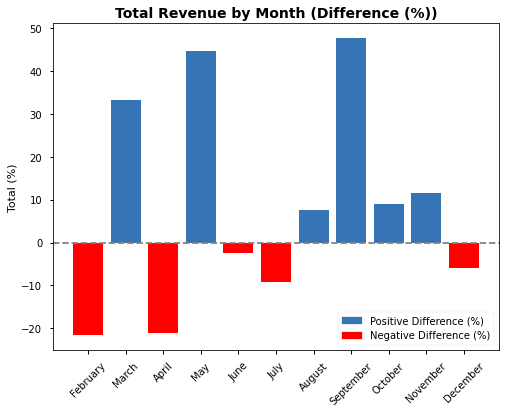

In [54]:
colors = ['red' if val < 0 else '#3674B5' for val in total_sales_month['pct_difference']]
red_patch = mpatches.Patch(color='red', label='Negative Difference (%)')
blue_patch = mpatches.Patch(color='#3674B5', label='Positive Difference (%)')

fig, axes = plt.subplots(figsize=(10,7))
axes.bar(total_sales_month['Month'],total_sales_month['pct_difference'],color=colors,label='Difference (%)')
axes.axhline(0, ls='--', color='grey',label="Total Amount : 0")
axes.set_title('Total Revenue by Month (Difference (%))',fontsize=14,weight='bold')
axes.set_ylabel('Total (%)')
axes.set_ylim()
#axes.tick_params(axis='x',rotation=45)
axes.legend(handles=[blue_patch, red_patch])
plt.show()

#### Conclusion
**Based on the analysis of the monthly order quantities and total amounts:**

- **Highest Order and Sales Months:**\
**September, October, and November** have the **highest quantity** of orders and total sales. These months indicate a significant increase in customer activity and revenue.

- **Significant Differences:** \
The **largest positive** difference is observed in **September**, with a `47.61%` **increase** from **August**. Conversely, the **largest negative** difference is observed in **April**, with a `-21.16%` **decrease** from **March**.

- **Peak Activity Months:** \
**March, May, September, October, and November** are the months with the **highest increases** in order quantities and total amounts, suggesting these months are critical for business activities.

- **Consistency:**\
**June and December** show relatively **smaller negative** differences, indicating some level of consistency in order quantities and total amounts.

**Recommendations :**
- **Resource Allocation:** \
Optimize staffing and inventory levels during peak months **(March, May, September, October, and November)** to handle increased customer activity efficiently.

- **Targeted Promotions:** \
Schedule promotions and special offers in **September, October, and November** to maximize customer engagement and sales.

- **Monitor Trends:** \
Continuously monitor the distribution of activities to identify any emerging patterns or trends that may require adjustments in resource allocation or promotional strategies.

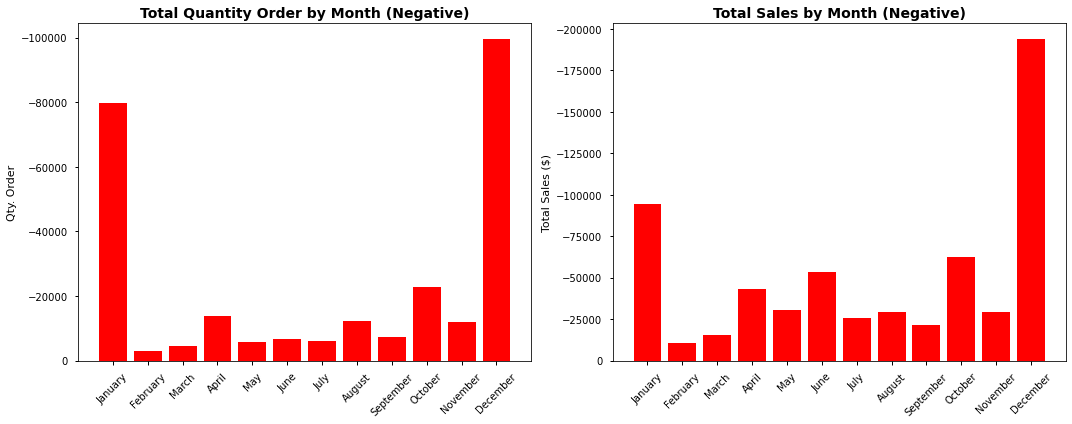

In [55]:
# Sales & Qty by Month (Negative)
fig, axes= plt.subplots(1,2,figsize=(15,6))
axes[0].bar(x=total_sales_month_negative['Month'],height=total_sales_month_negative['Qty. Order'],color='red')
#axes[0].plot(total_sales_month_negative['Month'], total_sales_month_negative['Qty. Order'], marker='o',color='#FBA518',linewidth=3)
axes[0].set_ylabel('Qty. Order')
axes[0].set_title('Total Quantity Order by Month (Negative)',fontsize=14,weight='bold')
axes[0].tick_params(axis='x',rotation=45)
axes[0].invert_yaxis()

axes[1].bar(x=total_sales_month_negative['Month'],height=total_sales_month_negative['Total'],color='red')
#axes[1].plot(total_sales_month_negative['Month'], total_sales_month_negative['Total'], marker='o',color='#FBA518', linewidth=3)
axes[1].set_ylabel('Total Sales ($)')
axes[1].set_title('Total Sales by Month (Negative)',fontsize=14,weight='bold')
axes[1].tick_params(axis='x',rotation=45)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### **Conclusion**
**Based on the analysis of the negative order quantities and their corresponding total amounts:**

- **Highest Negative Impact Months:**\
**December** has the **highest negative order** quantity `(-99,451)` and the **highest negative total amount** `(-193,700.88)`, followed by **January** with a **negative** order quantity of `-79,767` and a **negative** total amount of `-94,369.41`. These months indicate significant drops in order quantities and sales.

- **Significant Negative Trends:**\
Other months with **notable negative** order quantities and total amounts include **October, April, and November**. These months show substantial negative impacts on order quantities and sales.

- **Consistent Negative Impact:**\
The data shows a consistent negative impact across several months, suggesting potential ongoing issues affecting order fulfillment and revenue generation.

**Recommendations :**
- **Investigate Causes:**\
Conduct a thorough investigation to identify the underlying causes of the significant negative order quantities and total amounts, especially in **December and January**. This may include examining operational inefficiencies, customer complaints, or external factors.

- **Implement Corrective Measures:**\
Based on the investigation results, implement corrective measures to address the identified issues. This may involve optimizing order processing, improving customer service, or revising pricing strategies.

- **Monitor and Adjust:**\
Continuously monitor the order quantities and total amounts to track the effectiveness of the implemented measures. Make necessary adjustments to ensure sustained improvement in order fulfillment and revenue generation.

- **Seasonal Analysis:**\
Given that **December and January** are typically **holiday** months, consider analyzing seasonal trends and developing strategies to mitigate negative impacts during these period.

### Sales by Week

In [56]:
# Total sales by week
# Filtering
total_sales_week = clean_df.loc[clean_df['Quantity'] > 0]
total_sales_week = total_sales_week.groupby(['week'],as_index=False).agg({'Quantity':'sum', 'TotalAmount':'sum'})
total_sales_week.rename(columns={'week':'Week','Quantity':'Qty. Order','TotalAmount':'Total'}, inplace=True)

In [146]:
# Feature Engineering
total_sales_week['difference'] = total_sales_week['Total'].diff()
total_sales_week['pct_difference'] = total_sales_week['Total'].pct_change()*100

In [58]:
print('Total Sales by Week')
total_sales_week.T

Total Sales by Week


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
Week,W-01,W-02,W-03,W-04,W-05,W-06,W-07,W-08,W-09,W-10,W-11,W-12,W-13,W-14,W-15,W-16,W-17,W-18,W-19,W-20,W-21,W-22,W-23,W-24,W-25,W-26,W-27,W-28,W-29,W-30,W-31,W-32,W-33,W-34,W-35,W-36,W-37,W-38,W-39,W-40,W-41,W-42,W-43,W-44,W-45,W-46,W-47,W-48,W-49,W-50,W-51
Qty. Order,70148,76829,131231,57897,65037,47456,76725,79855,65636,63560,83202,72865,94672,63987,84188,74047,49036,73587,101609,103838,79532,54460,92047,99089,70051,68459,79487,75102,101869,100390,99033,91482,98182,93744,69837,103322,115456,163415,115695,164837,111426,147103,144702,148460,156285,156756,154179,223127,325981,96188,30785
Total,114636.80,154344.85,175452.23,104861.00,105955.81,87827.94,125700.15,130380.77,117386.82,112193.93,137669.82,129560.72,143657.58,119697.73,134930.82,115969.40,73374.06,131094.12,178574.32,195818.79,146776.61,102040.37,193704.12,171702.44,112600.67,116250.82,131222.52,118078.73,167284.44,164258.04,155943.00,143544.62,167634.40,147595.96,113825.97,166212.46,208718.88,309091.50,193654.43,296214.24,203708.95,254775.57,236456.84,259374.02,263717.33,276216.98,248234.58,399461.01,620646.10,163116.12,46059.51


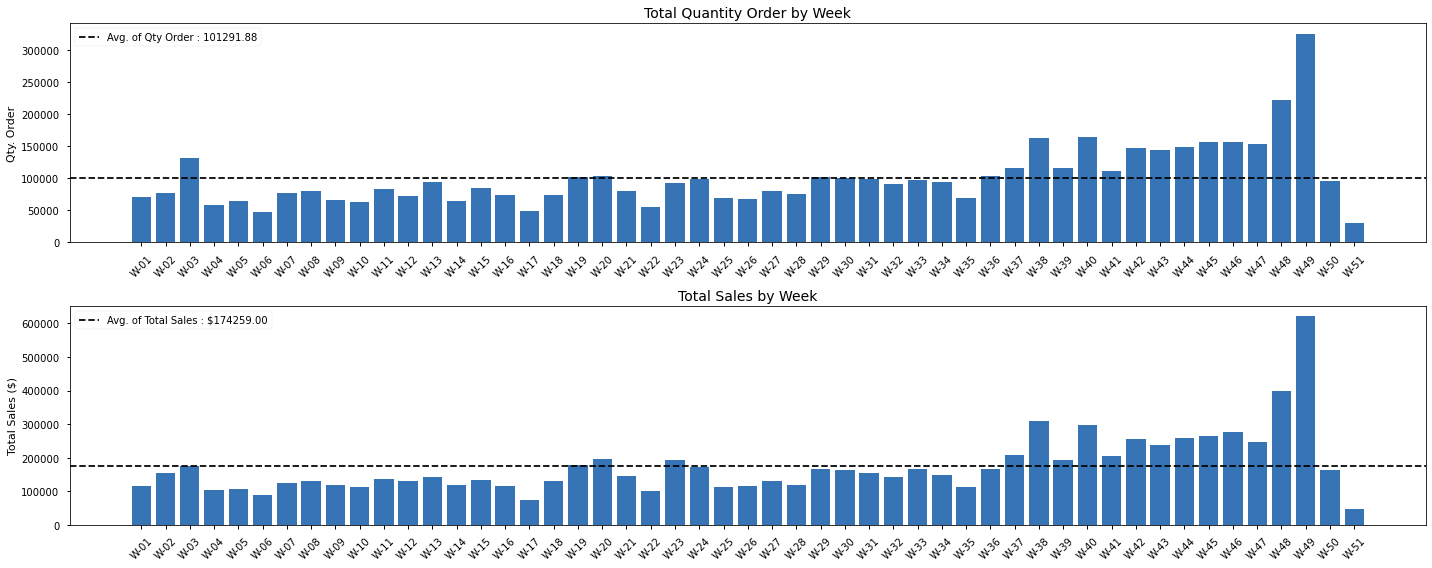

In [59]:
# Sales & Qty by Week
fig, axes = plt.subplots(2,1,figsize=(20,8))
axes[0].bar(total_sales_week['Week'],total_sales_week['Qty. Order'],color='#3674B5')
axes[0].axhline(total_sales_week['Qty. Order'].mean(), ls='--', color='black',label=f"Avg. of Qty Order : {total_sales_week['Qty. Order'].mean() :.2f}")
axes[0].tick_params(axis='x',rotation=45)
axes[0].set_title('Total Quantity Order by Week',fontsize=14)
axes[0].set_ylabel('Qty. Order')
axes[0].legend()

axes[1].bar(total_sales_week['Week'],total_sales_week['Total'],color='#3674B5')
axes[1].axhline(total_sales_week['Total'].mean(), ls='--', color='black',label=f"Avg. of Total Sales : ${total_sales_week['Total'].mean() :.2f}")
axes[1].tick_params(axis='x',rotation=45)
axes[1].set_title('Total Sales by Week',fontsize=14)
axes[1].set_ylabel('Total Sales ($)')
axes[1].legend()
plt.tight_layout()
plt.show()

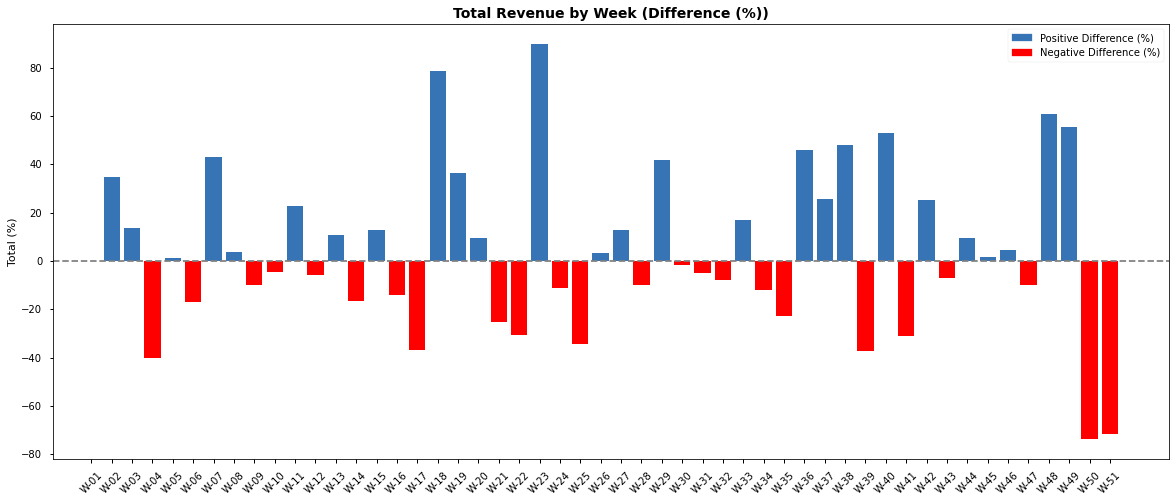

In [61]:
# Sales & Qty by Week, DIfference (%)
colors = ['red' if val < 0 else '#3674B5' for val in total_sales_week['pct_difference']]
red_patch = mpatches.Patch(color='red', label='Negative Difference (%)')
blue_patch = mpatches.Patch(color='#3674B5', label='Positive Difference (%)')

fig, axes = plt.subplots(figsize=(20,8))
axes.bar(total_sales_week['Week'],total_sales_week['pct_difference'],color=colors,label='Difference (%)')
axes.axhline(0, ls='--', color='grey',label="Quantity Order : 0")
axes.set_title('Total Revenue by Week (Difference (%))',fontsize=14,weight='bold')
axes.set_ylabel('Total (%)')
axes.set_ylim()
axes.tick_params(axis='x',rotation=45)
axes.legend(handles=[blue_patch, red_patch])
plt.show()

#### Conclusion
**Based on the analysis of the weekly order quantities and total amounts:**

- **Highest Order and Sales Weeks:**\
Weeks **W-48** and **W-49** have the highest quantities of orders `(223,127 and 325,981)` and total sales `($399,461.01 and $620,646.10)`, indicating peak customer activity and revenue.

- **Significant Variations:**\
There are significant variations in order quantities and total sales across different weeks. For example, week **W-50** shows a **sharp decline** in both order quantities and total sales **compared** to week **W-49**.

- **Significant Percentage Increases:**\
Weeks **W-23, W-18, and W-48** show the **highest percentage increases** in order quantities and total sales, with **W-23** having an `89.83%` **increase**, **W-18** having a `78.67%` **increase**, and **W-48** having a `60.92%` **increase**.

- **Significant Percentage Decreases:**\
Weeks **W-04, W-17, and W-22** show the **highest percentage decreases** in order quantities and total sales, with **W-04** having a `-40.23%` **decrease**, **W-17** having a `-36.73%` **decrease**, and **W-22** having a `-30.48%` **decrease**.

- **Consistent Growth:**\
Weeks **W-37 to W-49** show **consistent growth in both** order quantities and total sales, suggesting a period of increased customer activity.


**Recommendations :**
- **Resource Allocation:**\
Optimize staffing and inventory levels during peak weeks **(W-48 and W-49)** to handle increased customer activity efficiently.

- **Targeted Promotions:**\
Schedule promotions and special offers during weeks with significant percentage increases **(W-23, W-18, and W-48)** to maximize customer engagement and sales.

- **Monitor Trends:**\
Continuously monitor the weekly distribution of activities to identify any emerging patterns or trends that may require adjustments in resource allocation or promotional strategies.


### Trend Analysis (Time Series)

### Total Amount 

#### **`Daily Trend`**

In [62]:
# Total Amount Trend (Daily)
total_amount_trend = clean_df.groupby([clean_df['InvoiceDate'].dt.date])['TotalAmount'].agg(['sum','mean','median'])

In [63]:
# Feature Engineering
# Mov. Avg
total_amount_trend['moving_avg'] = total_amount_trend['sum'].rolling(15).mean()
total_amount_trend['moving_avg'] = total_amount_trend['moving_avg'].fillna(method='ffill')
total_amount_trend['moving_avg_30'] = total_amount_trend['sum'].rolling(30).mean()
total_amount_trend['moving_avg_30'] = total_amount_trend['moving_avg_30'].fillna(method='ffill')
# Difference
total_amount_trend['difference'] = total_amount_trend['sum'].diff()
total_amount_trend['pct_difference'] = total_amount_trend['sum'].pct_change()*100

In [64]:
total_amount_trend.tail(5)

,sum,mean,median,moving_avg,moving_avg_30,difference,pct_difference
InvoiceDate,,,,,,,
2011-11-29,48263.84,18.14,7.95,42544.36,42300.25,-1645.20,-3.30
2011-11-30,40436.41,18.56,12.50,43381.49,42518.53,-7827.43,-16.22
2011-12-01,43634.37,19.78,12.48,42514.28,42441.82,3197.96,7.91
2011-12-02,43948.09,22.22,12.48,42289.32,42700.34,313.72,0.72
2011-12-04,20176.35,10.68,5.00,40527.44,42227.16,-23771.74,-54.09
2011-12-05,56513.41,16.82,8.32,40634.32,43036.24,36337.06,180.10
2011-12-06,43540.22,16.73,8.25,41160.74,43532.38,-12973.19,-22.96
2011-12-07,68867.66,31.82,13.05,43786.19,44565.07,25327.44,58.17
2011-12-08,49318.74,19.22,8.30,44141.65,44215.40,-19548.92,-28.39


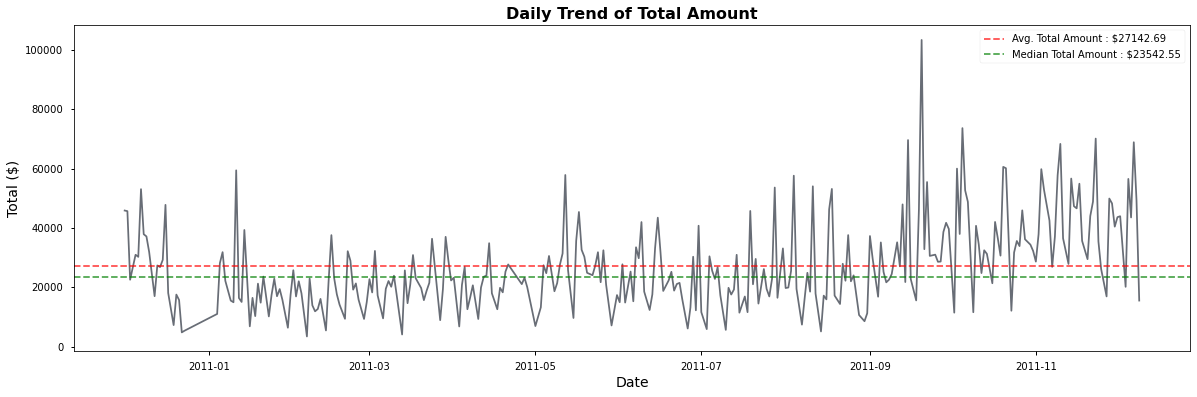

In [65]:
# Total Amount (Daily Trend)

fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend['sum'], color='#686D76')
axes.axhline(total_amount_trend['sum'].mean(), \
             ls='--', color='red', label=f"Avg. Total Amount : ${total_amount_trend['sum'].mean():.2f}", alpha=0.7)
axes.axhline(total_amount_trend['sum'].median(), \
             ls='--', color='green', label=f"Median Total Amount : ${total_amount_trend['sum'].median():.2f}",alpha=0.7)
axes.set_title('Daily Trend of Total Amount', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total ($)', fontsize=14)
axes.legend()
plt.show()

#### Conclusion

- **Daily Fluctuations:**\
The graph shows significant daily fluctuations in the total amount, indicating variability in daily sales or revenue.

- **Average and Median Amounts:**\
The average total amount is `$27,142.69`, while the median total amount is `$23,542.55`. This suggests that the distribution of daily total amounts is somewhat skewed, with some days having significantly higher amounts than others.

- **High and Low Periods:**\
The graph highlights periods of high and low total amounts relative to the average and median. Understanding these periods can help in identifying factors that contribute to higher or lower sales.

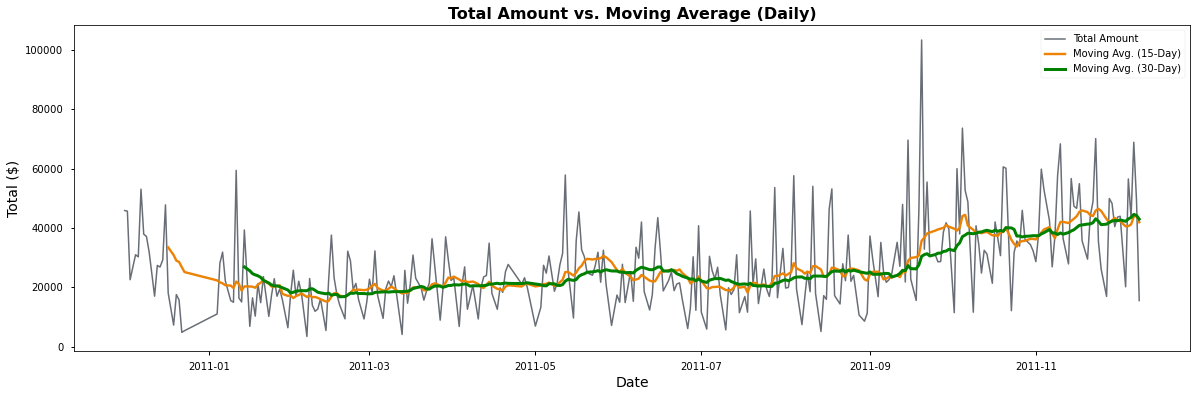

In [66]:
# Total Amount vs. Moving Average (Daily)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend['sum'], color='#686D76', label='Total Amount',linewidth=1.5)
axes.plot(total_amount_trend['moving_avg'], linestyle='-',linewidth=2.4, color='#EC8305',label='Moving Avg. (15-Day)')
axes.plot(total_amount_trend['moving_avg_30'], linestyle='-',linewidth=3, color='green',label='Moving Avg. (30-Day)')
axes.set_title('Total Amount vs. Moving Average (Daily)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total ($)', fontsize=14)
axes.legend()
plt.show()

#### Conclusion

- **Daily Fluctuations:**\
The grey line shows significant daily fluctuations in the total amount, indicating variability in daily sales or revenue.

- **Moving Averages:**\
The orange and green lines, representing the **15-day and 30-day** moving averages, respectively, provide a smoothed view of the overall trend, reducing the impact of short-term fluctuations.

- **Trend Analysis:**
The moving averages help identify the underlying trend in the total amount over time. For instance, periods where the moving averages are rising indicate an overall increase in sales, while periods where they are falling indicate a decline.


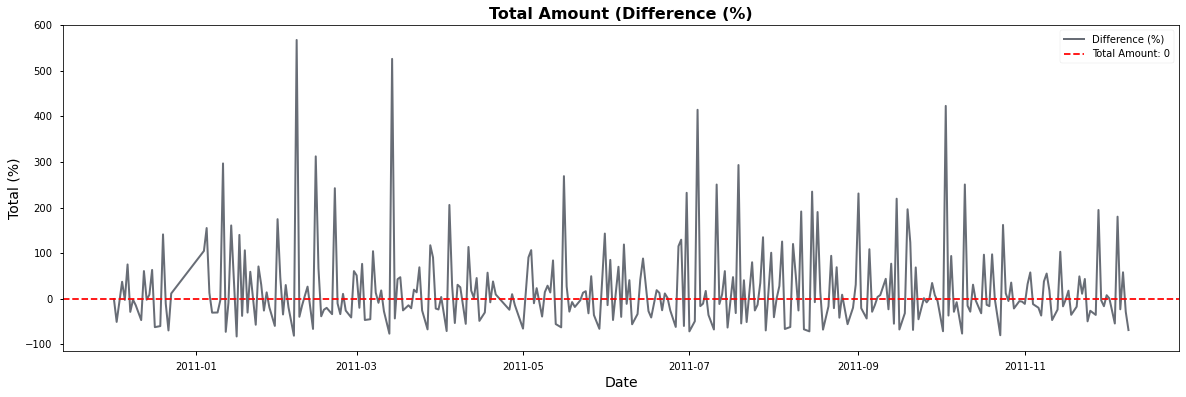

In [67]:
# Difference (%), Daily
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend['pct_difference'], linestyle='-',linewidth=2, color='#686D76',label='Difference (%)')
axes.axhline(0,ls='--',color='red',label="Total Amount: 0")
axes.set_title('Total Amount (Difference (%)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (%)', fontsize=14)
axes.legend()
plt.show()
plt.show()

#### Conclusion

- **Fluctuations:**\
The graph shows significant fluctuations in the percentage difference over time, indicating variability in daily sales or revenue. There are both peaks and troughs, highlighting periods of high and low percentage differences.

- **Positive and Negative Differences:**\
The graph highlights periods where the percentage difference is positive, indicating an increase in the total amount compared to the previous period, and periods where the percentage difference is negative, indicating a decrease.

- **Peaks and Troughs:**\
The graph includes several notable peaks, where the percentage difference reaches values as high as `~ 600%`, and troughs, where the percentage difference drops to `~ -100%`. These peaks and troughs suggest periods of significant change in the total amount.

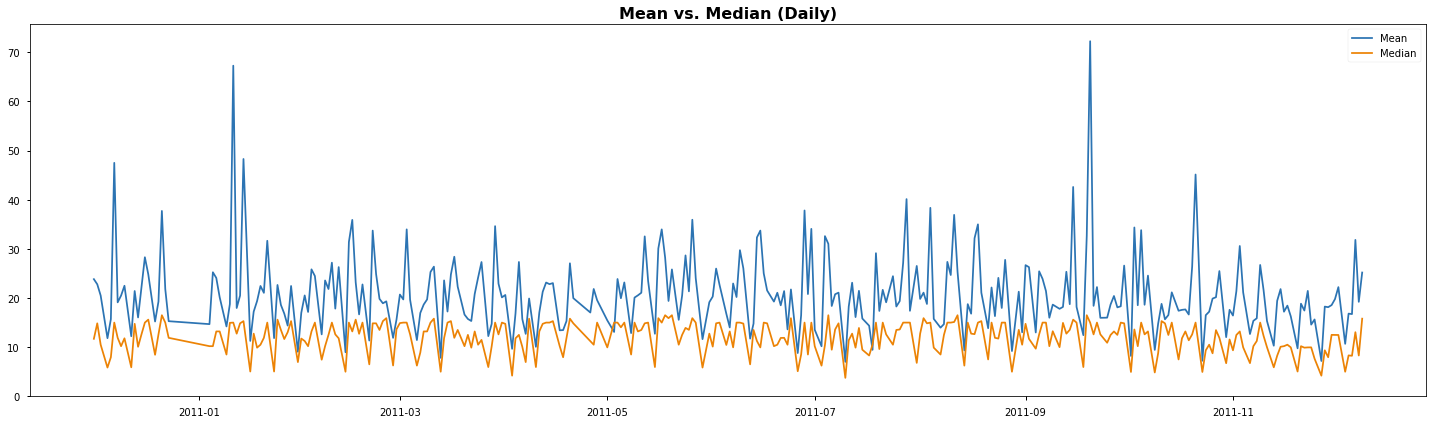

In [68]:
# Mean & Median Total amount (Daily)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend['mean'],  color='#2C74B3', label='Mean')
axes.plot(total_amount_trend['median'], color='#EC8305', label='Median')
axes.set_title('Mean vs. Median (Daily)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_ylim(0)
axes.legend()
plt.tight_layout()
plt.show()

#### **`Weekly Trend`**

In [69]:
# Total Amount Trend Weekly
total_amount_trend_weekly = clean_df.groupby([clean_df['InvoiceDate'].dt.to_period('W')])['TotalAmount'].agg(['sum','mean','median'])
total_amount_trend_weekly.index = total_amount_trend_weekly.index.to_timestamp()

In [70]:
# Feature Engineering
# Mov. Avg
total_amount_trend_weekly['moving_avg'] = total_amount_trend_weekly['sum'].rolling(4).mean()
total_amount_trend_weekly['rolling_total'] = total_amount_trend_weekly['sum'].rolling(4).sum()
# Difference
total_amount_trend_weekly['difference'] = total_amount_trend_weekly['sum'].diff()
total_amount_trend_weekly['pct_difference'] = total_amount_trend_weekly['sum'].pct_change()*100

In [151]:
total_amount_trend_weekly[['sum','pct_difference']].T

,sum,pct_difference
InvoiceDate,,
2010-11-29,145047.39,nan
2010-12-06,207271.98,42.90
2010-12-13,156572.76,-24.46
2010-12-20,43480.73,-72.23
2011-01-03,108741.64,150.09
2011-01-10,152005.52,39.79
2011-01-17,96611.01,-36.44
2011-01-24,98843.01,2.31
2011-01-31,103659.46,4.87


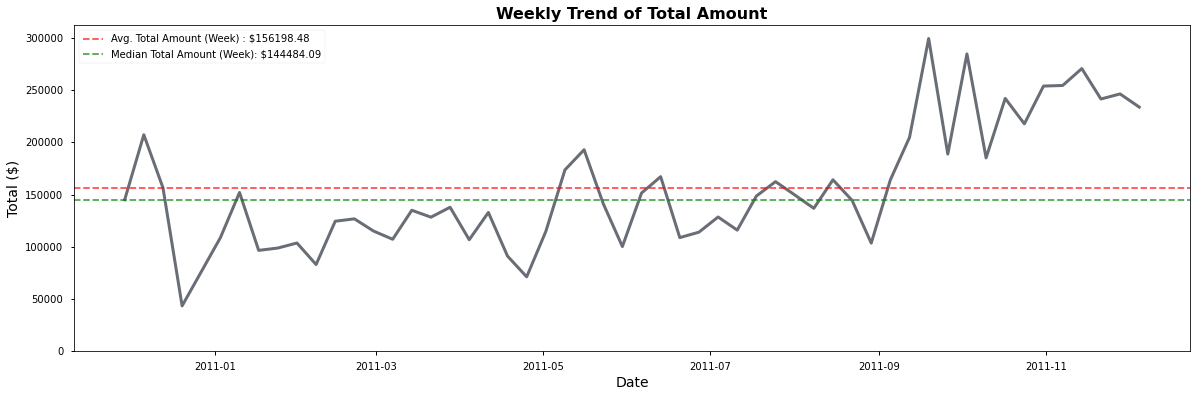

In [72]:
# Plot Total Amount Weekly

fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_weekly['sum'], color='#686D76',linewidth=3)
axes.axhline(total_amount_trend_weekly['sum'].mean(), \
             ls='--', color='red', label=f"Avg. Total Amount (Week) : ${total_amount_trend_weekly['sum'].mean():.2f}", alpha=0.7)
axes.axhline(total_amount_trend_weekly['sum'].median(), \
             ls='--', color='green', label=f"Median Total Amount (Week): ${total_amount_trend_weekly['sum'].median():.2f}",alpha=0.7)
axes.set_title('Weekly Trend of Total Amount', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total ($)', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.show()

#### Conclusion

- **Highest Revenue Weeks:**\
The weeks of `2011-09-19, 2011-10-03, and 2011-11-07` show the **highest** total amounts, indicating peak revenue periods.

- **Significant Variability:**\
There is significant variability in weekly total amounts, with some weeks showing notably higher or lower totals compared to others.

- **Trend Analysis:**\
The data shows an **overall upward trend** in total amounts towards the end of the year, particularly from **September to November 2011**, suggesting increased sales during this period.

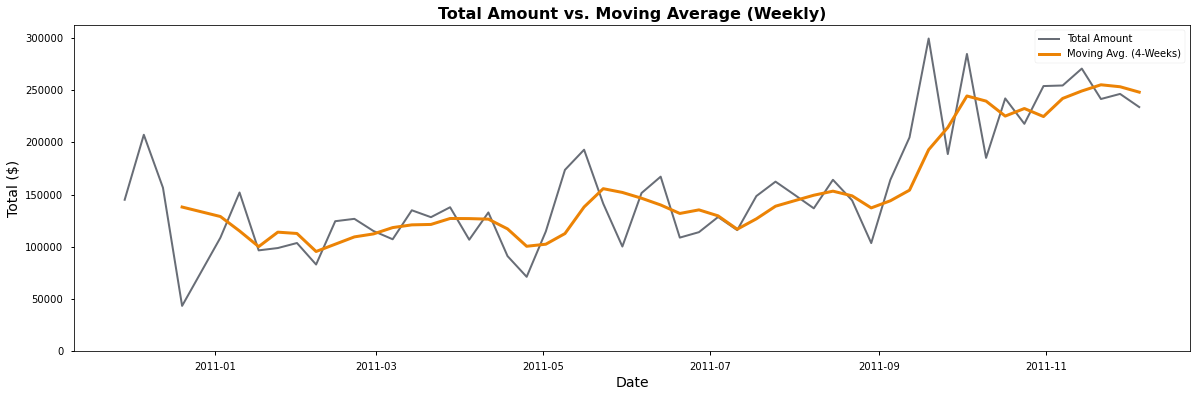

In [73]:
# Total Amount vs. Moving Average (Weekly)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_weekly['sum'], color='#686D76', label='Total Amount',linewidth=2)
axes.plot(total_amount_trend_weekly['moving_avg'], linestyle='-',linewidth=3, color='#EC8305',label='Moving Avg. (4-Weeks)')
axes.set_title('Total Amount vs. Moving Average (Weekly)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total ($)', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.show()

#### Conclusion

- **Rising Trend:**\
The moving average shows an **upward trend**, particularly from **September to November 2011**, indicating increased sales during this period.

- **Significant Peaks:**\
Weeks ending on `2011-09-19, 2011-09-26, 2011-10-03, and 2011-11-07` show **significant peaks** in the moving average, highlighting periods of high revenue.

- **Steady Growth:**
The overall trend indicates steady growth in total amounts, suggesting effective business strategies during these periods.

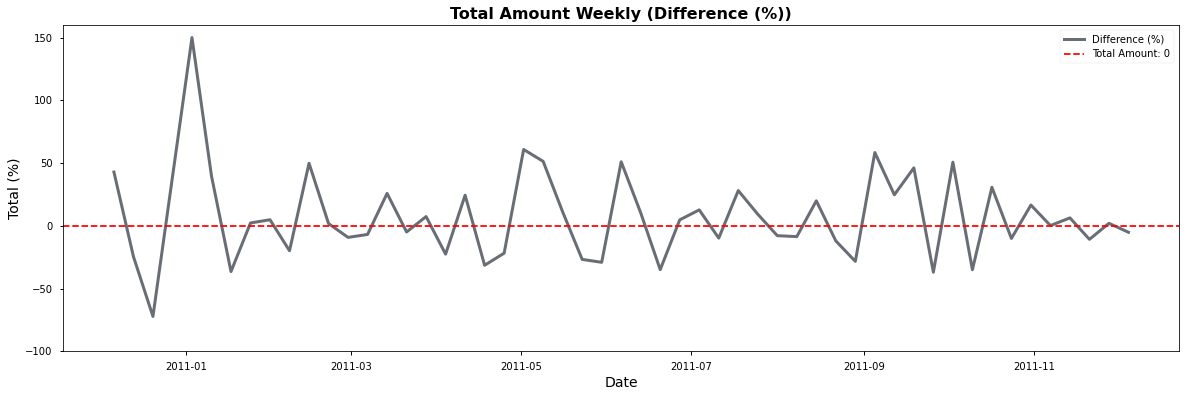

In [74]:
# Difference
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_weekly['pct_difference'], linestyle='-',linewidth=3, color='#686D76',label='Difference (%)')
axes.axhline(0,ls='--',color='red',label="Total Amount: 0")
axes.set_title('Total Amount Weekly (Difference (%))', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (%)', fontsize=14)
axes.set_ylim(-100,160)
axes.legend()
plt.show()
plt.show()

#### Conclusion

- **Significant Percentage Increases:**\
Weeks ending on `2011-01-03, 2011-05-02, and 2011-09-05` show the **highest percentage increases** in total amounts, with **increases** of `150.09%, 60.88%, and 58.46%`, **respectively**.

- **Significant Percentage Decreases:**\
Weeks ending on `2010-12-20, 2011-04-18, and 2011-09-26` show the **highest percentage decreases** in total amounts, with **decreases** of `-72.23%, -31.44%, and -36.95%`, **respectively**.

- **Overall Trend:**
The data shows an overall **upward trend** in total amounts towards the end of the year, particularly from **September to November 2011**, suggesting increased sales during this period.

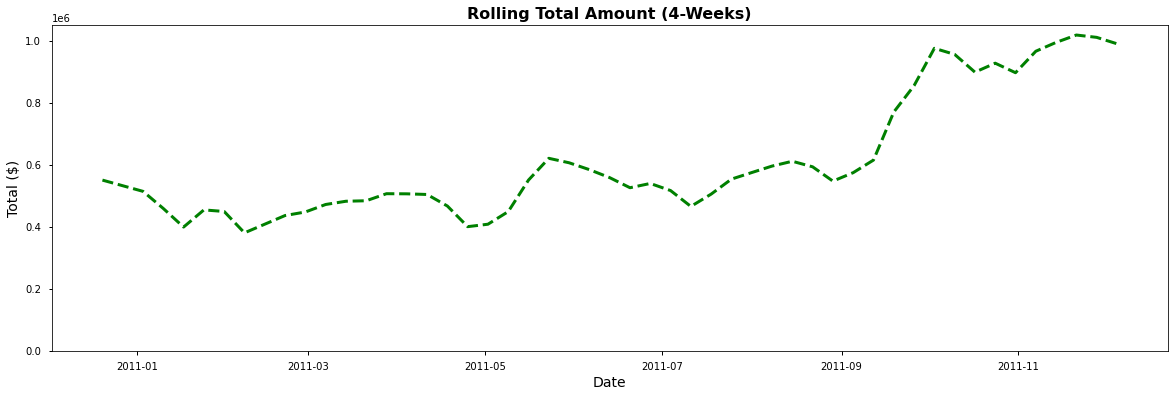

In [75]:
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_weekly['rolling_total'], linestyle='dashed',linewidth=3, color='green')
axes.set_title('Rolling Total Amount (4-Weeks)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total ($)', fontsize=14)
axes.set_ylim(0)
plt.show()

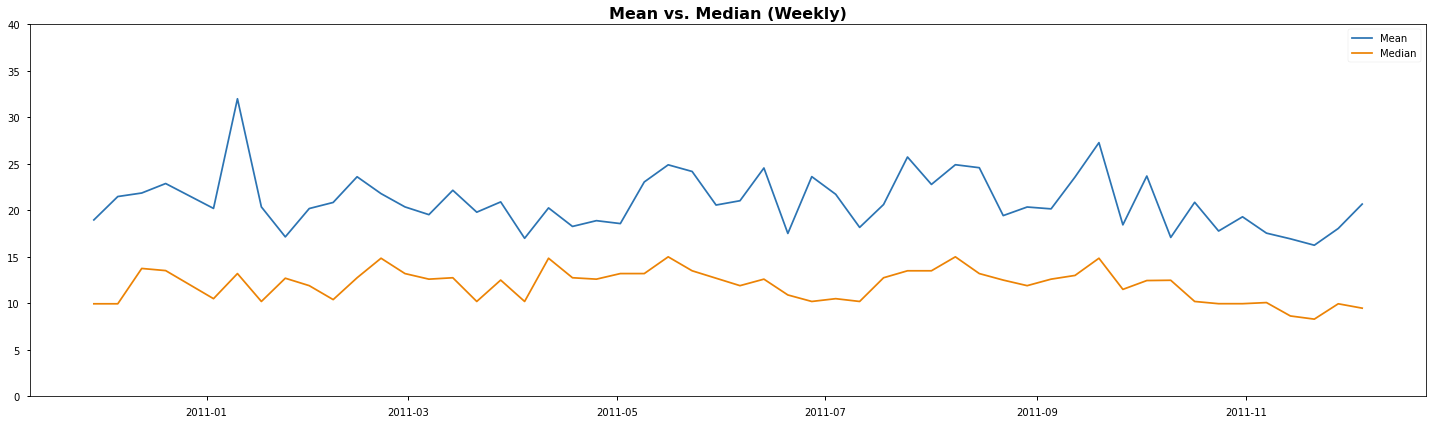

In [76]:
# Mean & Median Total amount (Weekly)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_weekly['mean'],  color='#2C74B3', label='Mean')
axes.plot(total_amount_trend_weekly['median'], color='#EC8305', label='Median')
axes.set_title('Mean vs. Median (Weekly)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.legend()
axes.set_ylim(0,40)
plt.tight_layout()
plt.show()

#### **`Monthly Trend`**

In [77]:
# Total Amount Trend Monthly
total_amount_trend_monthly = clean_df.groupby([clean_df['InvoiceDate'].dt.to_period('M')])['TotalAmount'].agg(['sum','mean','median'])
total_amount_trend_monthly.index = total_amount_trend_monthly.index.to_timestamp()

In [78]:
# Feature Engineering
# Difference
total_amount_trend_monthly['difference'] = total_amount_trend_monthly['sum'].diff()
total_amount_trend_monthly['pct_difference'] = total_amount_trend_monthly['sum'].pct_change()*100

In [152]:
total_amount_trend_monthly[['sum','pct_difference']]

,sum,pct_difference
InvoiceDate,,
2010-12-01,552372.86,nan
2011-01-01,473731.90,-14.24
2011-02-01,435534.07,-8.06
2011-03-01,578576.21,32.84
2011-04-01,425222.67,-26.51
2011-05-01,647011.67,52.16
2011-06-01,606862.52,-6.21
2011-07-01,573112.32,-5.56
2011-08-01,615078.09,7.32


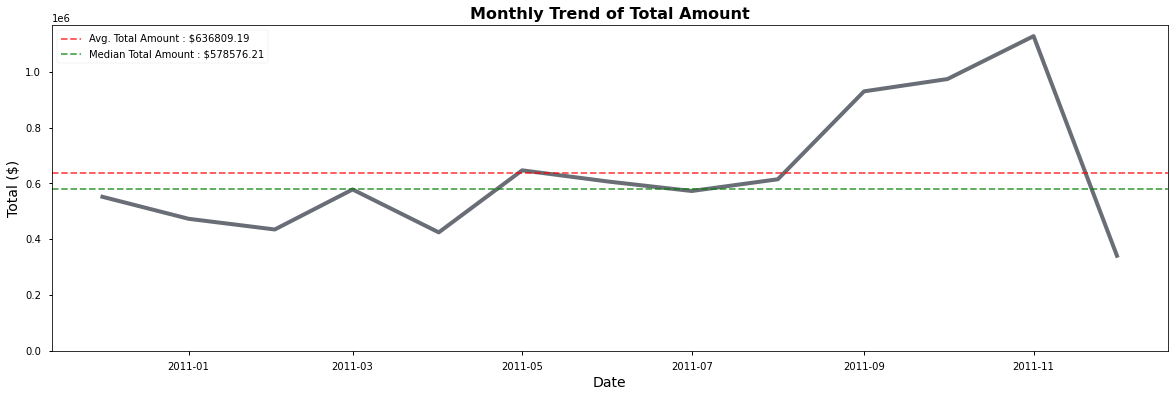

In [80]:
# Total Amount (Monthly Trend)

fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_monthly['sum'], color='#686D76',linestyle='-', linewidth=4)
axes.axhline(total_amount_trend_monthly['sum'].mean(), \
             ls='--', color='red', label=f"Avg. Total Amount : ${total_amount_trend_monthly['sum'].mean():.2f}", alpha=0.7)
axes.axhline(total_amount_trend_monthly['sum'].median(), \
             ls='--', color='green', label=f"Median Total Amount : ${total_amount_trend_monthly['sum'].median():.2f}",alpha=0.7)
axes.set_title('Monthly Trend of Total Amount', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total ($)', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.show()

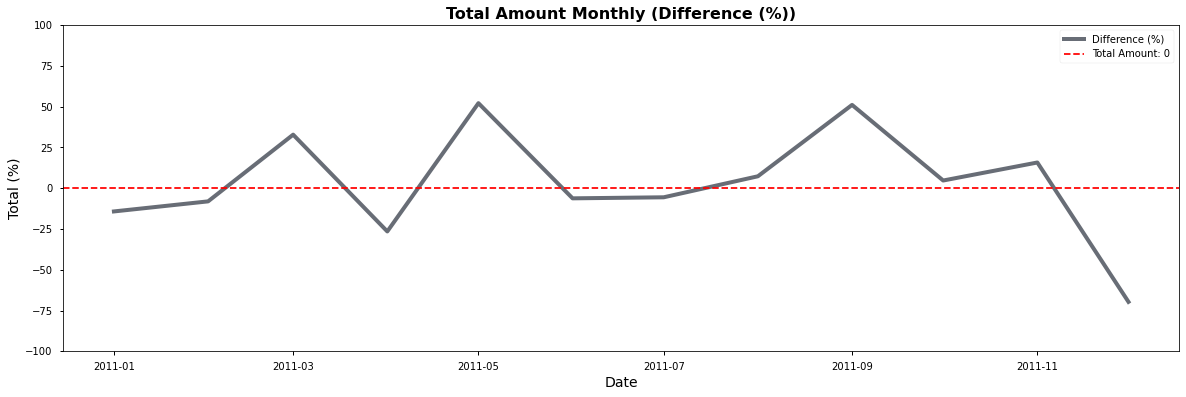

In [81]:
# Difference
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_monthly['pct_difference'], linestyle='-',linewidth=4, color='#686D76',label='Difference (%)')
axes.axhline(0,ls='--',color='red',label="Total Amount: 0")
axes.set_title('Total Amount Monthly (Difference (%))', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (%)', fontsize=14)
axes.set_ylim(-100,100)
axes.legend()
plt.show()
plt.show()

#### Conclusion

- **Highest Revenue Months:**\
The months of **September, October, and November 2011** show the **highest** total amounts, indicating peak revenue periods.

- **Significant Percentage Increases:**\
The months of **March, May, and September 2011** show the **highest percentage increases** in total amounts, with **increases** of `32.84%, 52.16%, and 51.10%`, **respectively**.

- **Significant Percentage Decreases:**\
The months of **April, January, and December 2011** show the **highest percentage decreases** in total amounts, with **decreases** of `-26.51%, -14.24%, and -69.69%`, **respectively**.

- **Overall Trend:**\
The data shows an overall **upward trend** in total amounts towards the end of the year, particularly from **September to November 2011**, suggesting increased sales during this period.

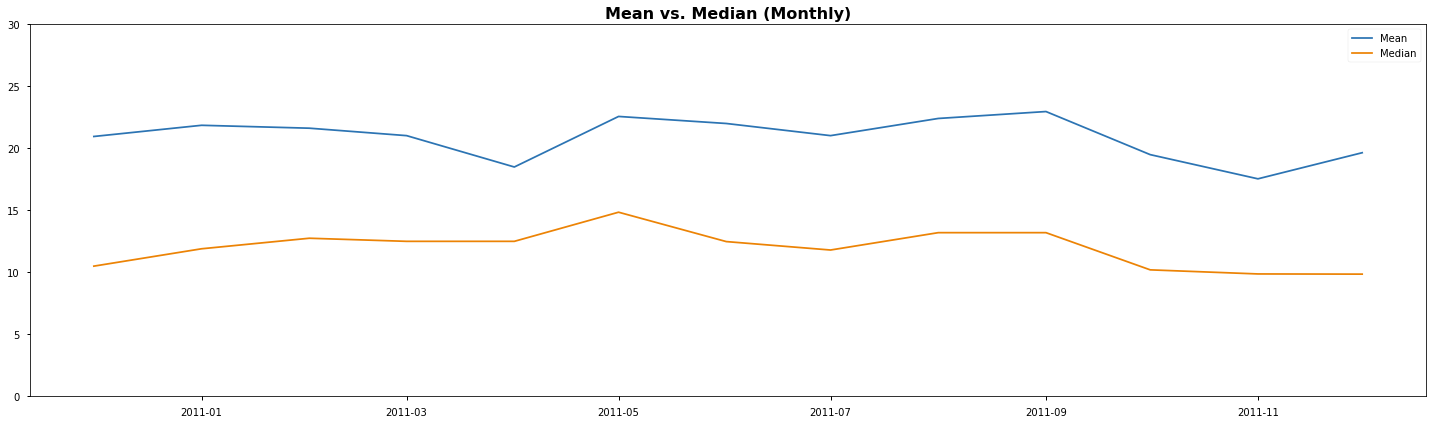

In [82]:
# Mean & Median Total amount (Monthly)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_amount_trend_monthly['mean'],  color='#2C74B3', label='Mean')
axes.plot(total_amount_trend_monthly['median'], color='#EC8305', label='Median')
axes.set_title('Mean vs. Median (Monthly)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.legend()
axes.set_ylim(0,30)
plt.tight_layout()
plt.show()

### Quantity Order 

#### `Daily Trend`

In [83]:
# Total Quantity Trend
total_quantity_trend = clean_df.groupby([clean_df['InvoiceDate'].dt.date])['Quantity'].agg(['sum','mean','median'])

In [84]:
# Feature Engineering
# Mov. Avg
total_quantity_trend['moving_avg'] = total_quantity_trend['sum'].rolling(15).mean()
total_quantity_trend['moving_avg'] = total_quantity_trend['moving_avg'].fillna(method='ffill')
total_quantity_trend['moving_avg_30'] = total_quantity_trend['sum'].rolling(30).mean()
total_quantity_trend['moving_avg_30'] = total_quantity_trend['moving_avg_30'].fillna(method='ffill')
# Difference
total_quantity_trend['difference'] = total_quantity_trend['sum'].diff()
total_quantity_trend['pct_difference'] = total_quantity_trend['sum'].pct_change()*100

In [85]:
total_quantity_trend.tail(5)

,sum,mean,median,std,moving_avg,moving_avg_30,difference,pct_difference
InvoiceDate,,,,,,,,
2011-12-05,38224,11.38,4,33.95,24400.53,25537.40,26919.00,238.12
2011-12-06,26641,10.24,4,22.78,24848.80,25877.80,-11583.00,-30.30
2011-12-07,40903,18.90,8,63.79,26348.33,26369.80,14262.00,53.53
2011-12-08,26837,10.46,4,47.82,26546.73,26147.30,-14066.00,-34.39
2011-12-09,9522,15.43,12,4615.17,25094.33,25386.27,-17315.00,-64.52


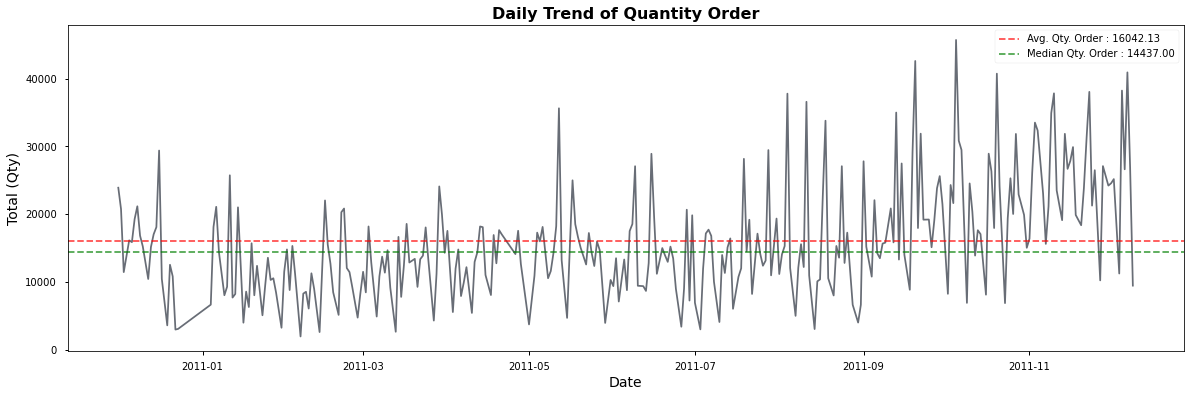

In [86]:
# Total Quantity (Daily Trend)

fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend['sum'], color='#686D76')
axes.axhline(total_quantity_trend['sum'].mean(), \
             ls='--', color='red', label=f"Avg. Qty. Order : {total_quantity_trend['sum'].mean():.2f}", alpha=0.7)
axes.axhline(total_quantity_trend['sum'].median(), \
             ls='--', color='green', label=f"Median Qty. Order : {total_quantity_trend['sum'].median():.2f}",alpha=0.7)
axes.set_title('Daily Trend of Quantity Order', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (Qty)', fontsize=14)
axes.legend()
plt.show()

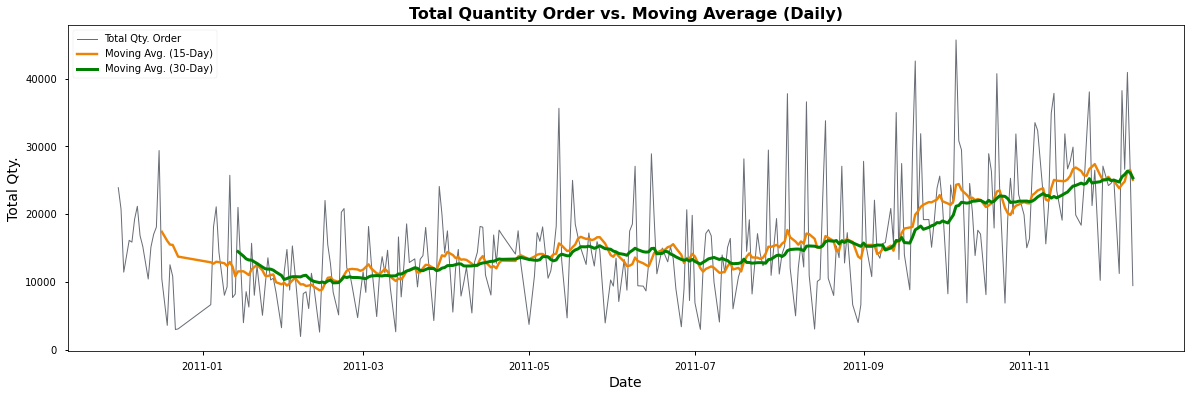

In [87]:
# Total Quantity Order vs. Moving Average (Daily)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend['sum'], color='#686D76', label='Total Qty. Order',linewidth=1)
axes.plot(total_quantity_trend['moving_avg'], linestyle='-',linewidth=2.4, color='#EC8305',label='Moving Avg. (15-Day)')
axes.plot(total_quantity_trend['moving_avg_30'], linestyle='-',linewidth=3, color='green',label='Moving Avg. (30-Day)')
axes.set_title('Total Quantity Order vs. Moving Average (Daily)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total Qty.', fontsize=14)
axes.legend()
plt.show()

#### Conclusion

- **Daily Fluctuations:**\
The grey line shows significant **daily fluctuations** in the total quantity ordered, indicating variability in daily orders.

- **Moving Averages:**\
The orange and green lines, representing the **15-day and 30-day** moving averages, respectively, provide a **smoothed** view of the overall trend, reducing the impact of short-term fluctuations.

- **Trend Analysis:**\
The moving averages help identify the underlying trend in the total quantity ordered over time. For instance, periods where the moving averages are rising indicate an overall increase in orders, while periods where they are falling indicate a decline.

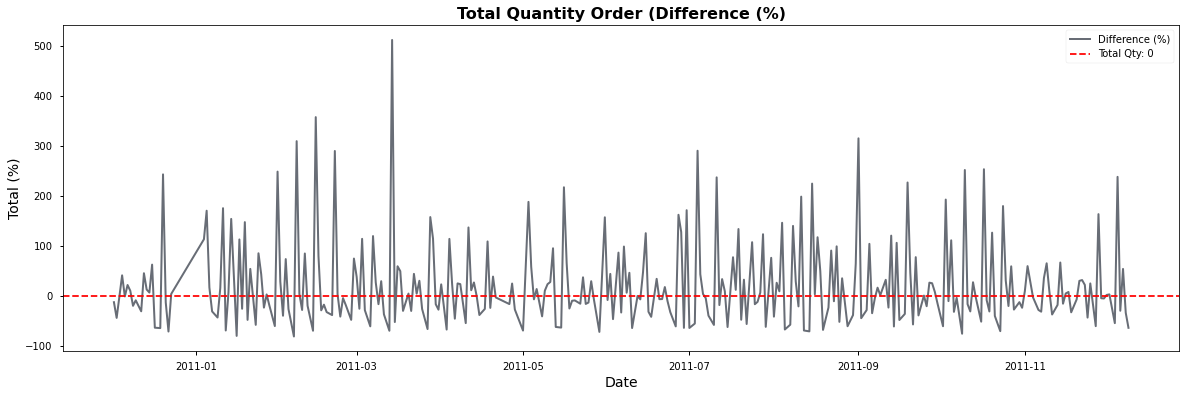

In [88]:
# Difference (%)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend['pct_difference'], linestyle='-',linewidth=2, color='#686D76',label='Difference (%)')
axes.axhline(0,ls='--',color='red',label="Total Qty: 0")
axes.set_title('Total Quantity Order (Difference (%)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (%)', fontsize=14)
axes.legend()
plt.show()


#### Conclusion

- **Fluctuations:**\
The graph shows significant fluctuations in the percentage difference over time, indicating variability in daily orders. There are both peaks and troughs, highlighting periods of high and low percentage differences.

- **Positive and Negative Differences:**\
The graph highlights periods where the percentage difference is positive, indicating an increase in the total quantity ordered compared to the previous period, and periods where the percentage difference is negative, indicating a decrease.

- **Peaks and Troughs:**\
The graph includes several **notable peaks**, where the **percentage difference reaches values** as high as `~ 500%`, and troughs, where the **percentage difference drops** to `~ -80%`. These peaks and troughs suggest periods of significant change in the total quantity ordered.

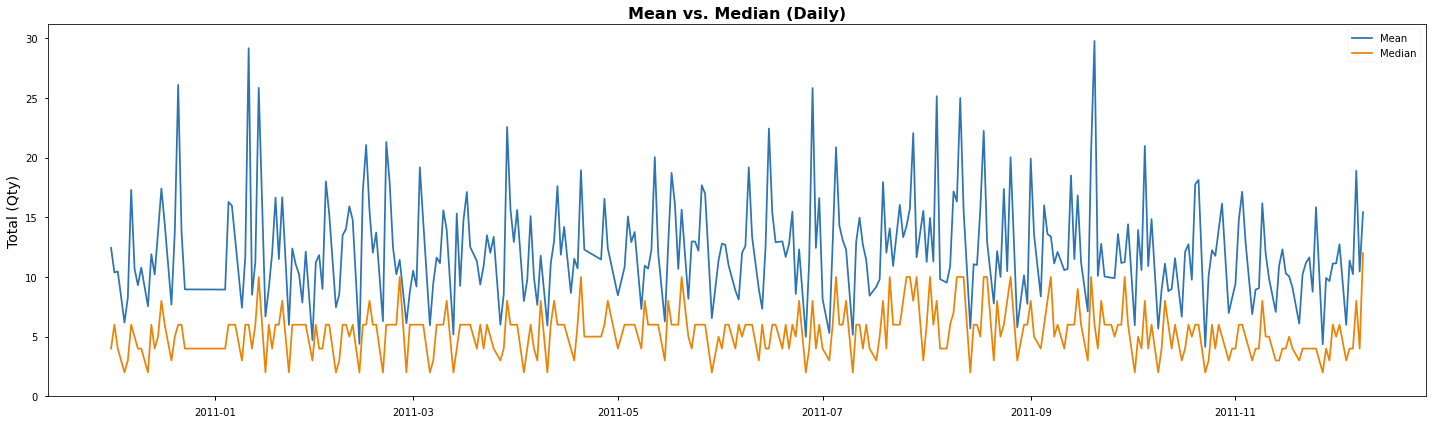

In [89]:
# Mean & Median Qty (Daily)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend['mean'],  color='#2C74B3', label='Mean')
axes.plot(total_quantity_trend['median'], color='#EC8305', label='Median')
axes.set_title('Mean vs. Median (Daily)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_ylabel('Total (Qty)', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.tight_layout()
plt.show()

#### **`Weekly Trend`**

In [90]:
# Total Quantity Order Weekly
total_quantity_trend_weekly = clean_df.groupby([clean_df['InvoiceDate'].dt.to_period('W')])['Quantity'].agg(['sum','mean','median'])
total_quantity_trend_weekly.index = total_quantity_trend_weekly.index.to_timestamp()

In [91]:
# Feature Engineering
# Difference
total_quantity_trend_weekly['moving_avg'] = total_quantity_trend_weekly['sum'].rolling(4).mean()
total_quantity_trend_weekly['rolling_total'] = total_quantity_trend_weekly['sum'].rolling(4).sum()

In [154]:
total_quantity_trend_weekly.tail(5)

,sum,mean,median,std,moving_avg,rolling_total
InvoiceDate,,,,,,
2011-11-07,152260,10.50,4,29.82,145873.00,583492.00
2011-11-14,154673,9.68,4,24.24,148265.25,593061.00
2011-11-21,151309,10.18,4,106.67,151209.75,604839.00
2011-11-28,138148,10.12,4,36.29,149097.50,596390.00
2011-12-05,142127,12.57,5,1078.04,146564.25,586257.00


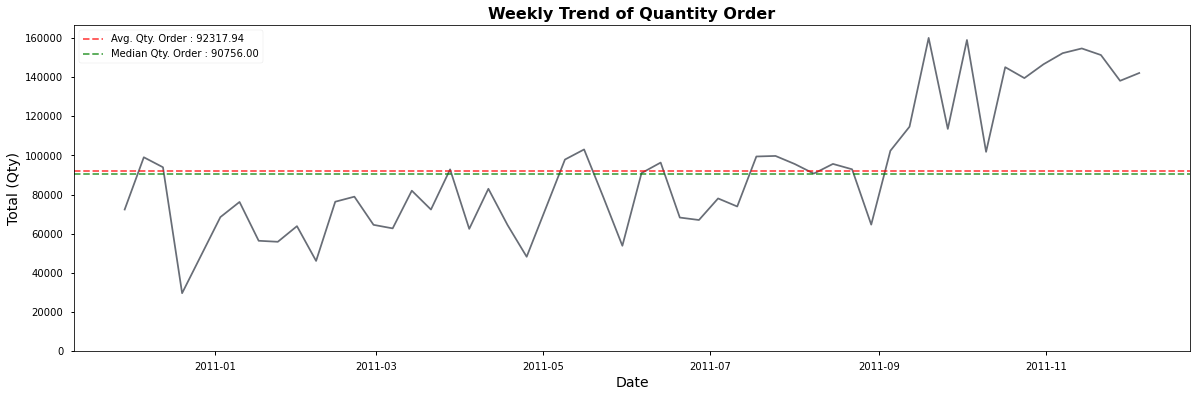

In [93]:
# Total Quantity (Weekly Trend)

fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_weekly['sum'], color='#686D76')
axes.axhline(total_quantity_trend_weekly['sum'].mean(), \
             ls='--', color='red', label=f"Avg. Qty. Order : {total_quantity_trend_weekly['sum'].mean():.2f}", alpha=0.7)
axes.axhline(total_quantity_trend_weekly['sum'].median(), \
             ls='--', color='green', label=f"Median Qty. Order : {total_quantity_trend_weekly['sum'].median():.2f}",alpha=0.7)
axes.set_title('Weekly Trend of Quantity Order', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (Qty)', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.show()

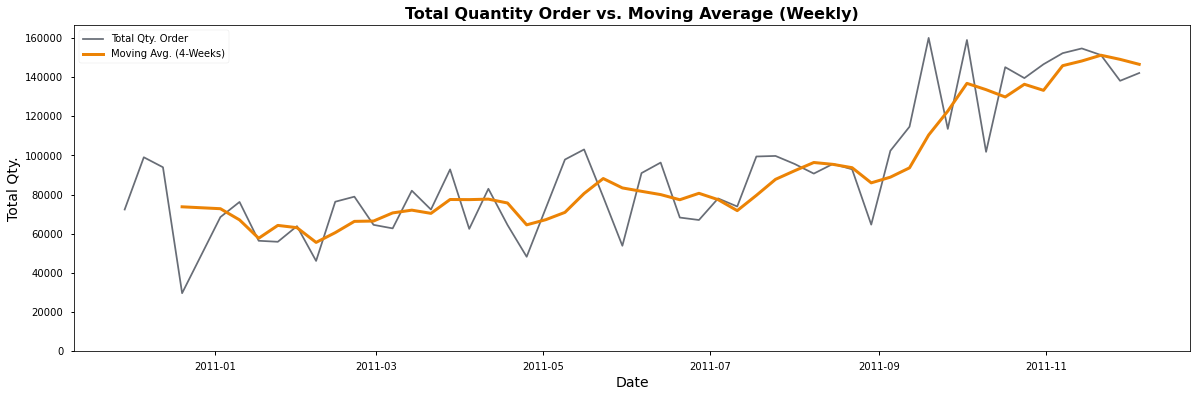

In [94]:
# Total Quantity Order vs. Moving Average (Weekly)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_weekly['sum'], color='#686D76', label='Total Qty. Order')
axes.plot(total_quantity_trend_weekly['moving_avg'], linestyle='-',linewidth=3, color='#EC8305',label='Moving Avg. (4-Weeks)')
axes.set_title('Total Quantity Order vs. Moving Average (Weekly)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total Qty.', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.show()

#### Conclusion

- **Fluctuations and Trends:**\
There are significant fluctuations in the total quantities ordered on a weekly basis. However, the moving averages provide a smoothed view of the overall trend, reducing the impact of short-term fluctuations.

- **Rising Periods:**\
Weeks ending on `2011-09-19, 2011-10-03, and 2011-11-07` show **significant rises** in total quantities ordered, indicating peak periods.

- **High Consistency:**\
The moving averages help identify periods of consistency in the total quantities ordered, such as the period from **August to November 2011**, where the quantities remained **relatively high**.

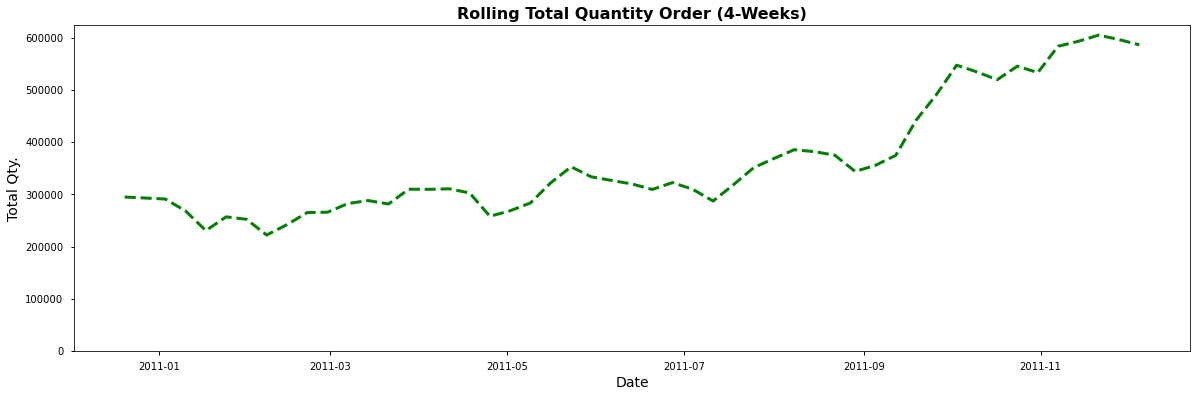

In [95]:
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_weekly['rolling_total'], linestyle='dashed',linewidth=3, color='green')
axes.set_title('Rolling Total Quantity Order (4-Weeks)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total Qty.', fontsize=14)
axes.set_ylim(0)
plt.show()

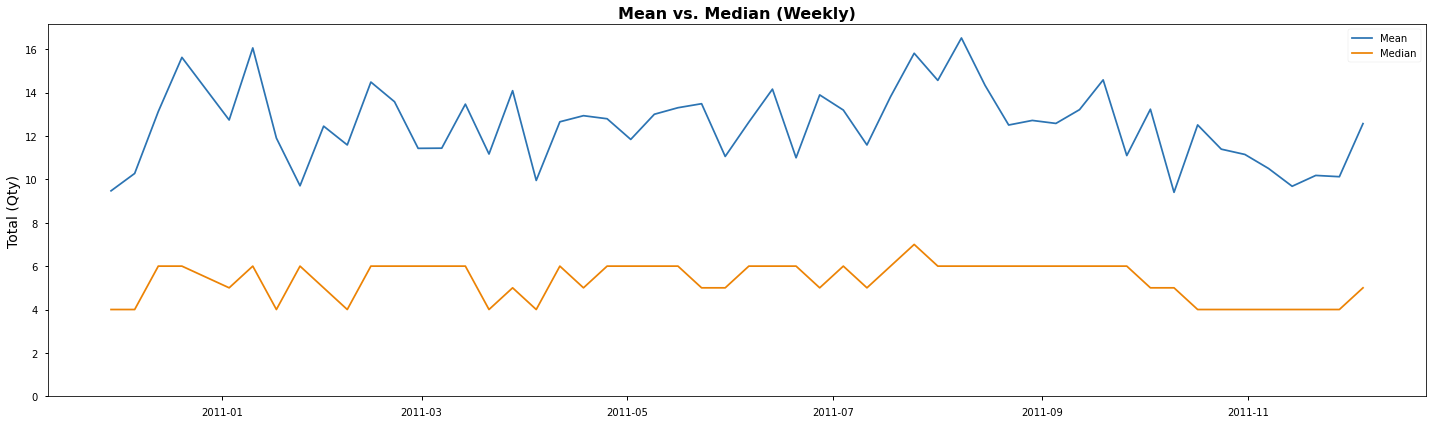

In [96]:
# Mean & Median Qty (Weekly)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_weekly['mean'],  color='#2C74B3', label='Mean')
axes.plot(total_quantity_trend_weekly['median'], color='#EC8305', label='Median')
axes.set_title('Mean vs. Median (Weekly)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_ylabel('Total (Qty)', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.tight_layout()
plt.show()

#### **`Monthly Trend`**

In [97]:
# Total Quantity Trend Monthly
total_quantity_trend_monthly = clean_df.groupby([clean_df['InvoiceDate'].dt.to_period('M')])['Quantity'].agg(['sum','mean','median'])
total_quantity_trend_monthly.index = total_quantity_trend_monthly.index.to_timestamp()

In [155]:
# Feature Engineering
# Difference
total_quantity_trend_monthly['difference'] = total_quantity_trend_monthly['sum'].diff()
total_quantity_trend_monthly['pct_difference'] = total_quantity_trend_monthly['sum'].pct_change()*100


In [157]:
total_quantity_trend_monthly[['sum','difference','pct_difference']]

,sum,difference,pct_difference
InvoiceDate,,,
2010-12-01,295177,nan,nan
2011-01-01,268755,-26422.00,-8.95
2011-02-01,262243,-6512.00,-2.42
2011-03-01,343095,80852.00,30.83
2011-04-01,277730,-65365.00,-19.05
2011-05-01,367115,89385.00,32.18
2011-06-01,356239,-10876.00,-2.96
2011-07-01,361359,5120.00,1.44
2011-08-01,385865,24506.00,6.78


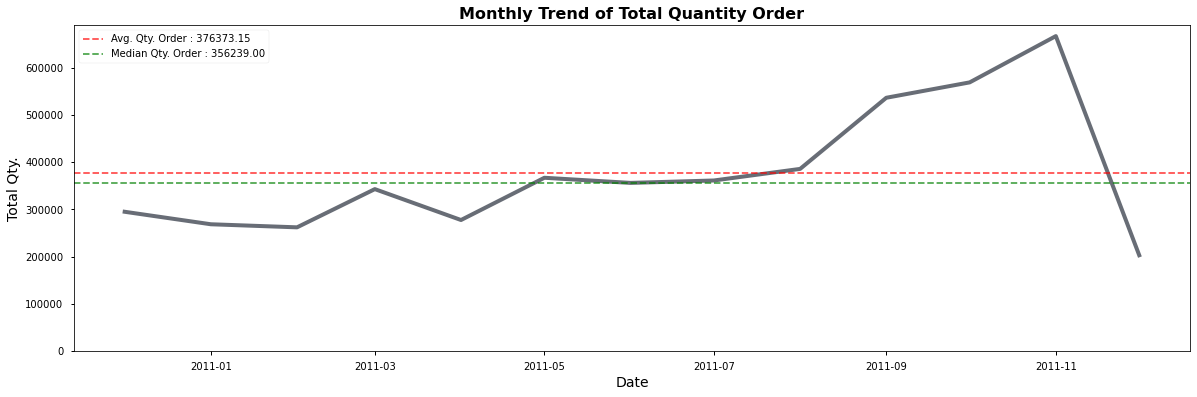

In [99]:
# Total Quantity Order (Monthly Trend)

fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_monthly['sum'], color='#686D76',linestyle='-', linewidth=4)
axes.axhline(total_quantity_trend_monthly['sum'].mean(), \
             ls='--', color='red', label=f"Avg. Qty. Order : {total_quantity_trend_monthly['sum'].mean():.2f}", alpha=0.7)
axes.axhline(total_quantity_trend_monthly['sum'].median(), \
             ls='--', color='green', label=f"Median Qty. Order : {total_quantity_trend_monthly['sum'].median():.2f}",alpha=0.7)
axes.set_title('Monthly Trend of Total Quantity Order', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total Qty.', fontsize=14)
axes.set_ylim(0)
axes.legend()
plt.show()

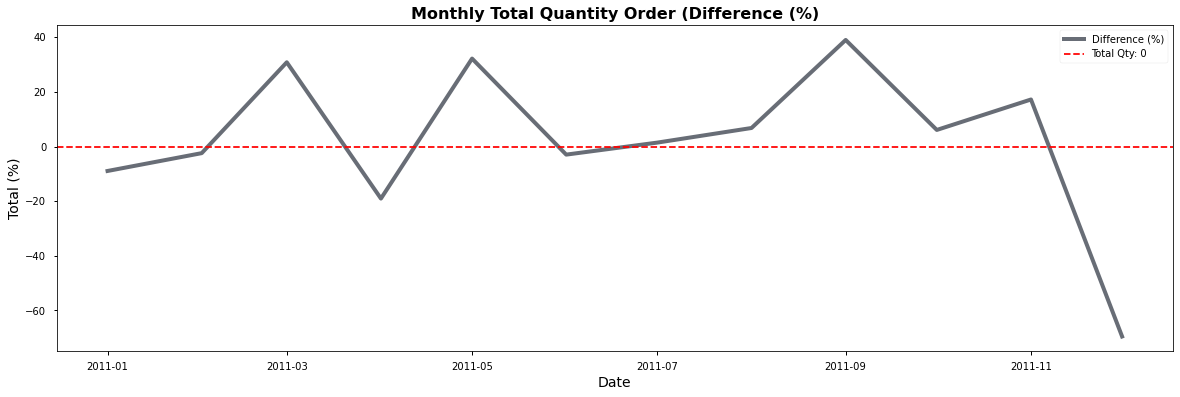

In [160]:
# Difference
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_monthly['pct_difference'], linestyle='-',linewidth=4, color='#686D76',label='Difference (%)')
axes.axhline(0,ls='--',color='red',label="Total Qty: 0")
axes.set_title('Monthly Total Quantity Order (Difference (%)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.set_xlabel('Date', fontsize=14)
axes.set_ylabel('Total (%)', fontsize=14)
axes.legend()
plt.show()


#### Conclusion

- **Highest Order Months:**\
The months of **September, October, and November 2011** show the **highest** total quantities ordered, indicating peak order periods.

- **Significant Percentage Increases:**\
The months of **March, May, and September 2011** show the **highest percentage increases** in total quantities ordered, with **increases** of `30.83%, 32.18%, and 39.00%`, **respectively**.

- **Significant Percentage Decreases:**\
The months of **April and December 2011** show the **highest percentage decreases** in total quantities ordered, with **decreases** of `-19.05% and -69.52%`, **respectively**.

- **Overall Trend:**\
The data shows an **overall upward trend** in total quantities ordered **towards the end of the year**, particularly from **September to November 2011**, suggesting increased orders during this period.

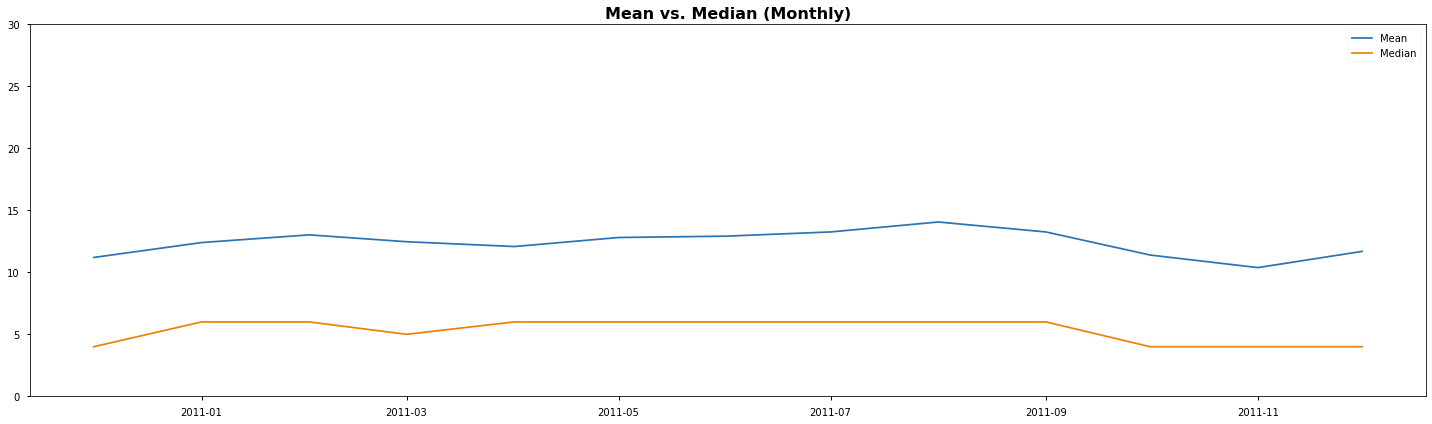

In [100]:
# Mean & Median Total Qty. Order (Monthly)
fig, axes = plt.subplots(figsize=(20,6))
axes.plot(total_quantity_trend_monthly['mean'],  color='#2C74B3', label='Mean')
axes.plot(total_quantity_trend_monthly['median'], color='#EC8305', label='Median')
axes.set_title('Mean vs. Median (Monthly)', fontsize=16, weight='bold',va='baseline',ha='center')
axes.legend()
axes.set_ylim(0,30)
plt.tight_layout()
plt.show()

## Task 8 : Analyze Top-Selling Products and Countries with Conclusion

### Country Analysis

In [102]:
# Grouping by Country
qty_rev_by_country = clean_df.groupby(['Country'])[['Quantity','TotalAmount']].sum().sort_values(by='TotalAmount',ascending=False)

In [103]:
# Filtering
top_5_qty_country = qty_rev_by_country[['Quantity']].sort_values(by='Quantity',ascending=False).head()
top_5_rev_country = qty_rev_by_country[['TotalAmount']].head()

In [104]:
print(f"Top 5 Country With Highest Total Revenue\n{'--'*20}")
display(top_5_rev_country)
print(f"Top 5 Country With Highest Total Quantity Order\n{'--'*24}")
display(top_5_qty_country)

Top 5 Country With Highest Total Revenue
----------------------------------------


,TotalAmount
Country,
United Kingdom,6747156.15
Netherlands,284661.54
EIRE,250001.78
Germany,221509.47
France,196626.05


Top 5 Country With Highest Total Quantity Order
------------------------------------------------


,Quantity
Country,
United Kingdom,3994870
Netherlands,200128
EIRE,136187
Germany,117341
France,109806


#### Conclusion

- **United Kingdom Dominance:**\
The **United Kingdom** stands out significantly with the **highest total revenue** `($6,747,156.15)` and the **highest total quantity ordered** `(3,994,870)`. This indicates that **the UK is the primary market** for your business.

- **Strong Performers:**\
The **Netherlands, EIRE, Germany, and France** also show **strong performance in both** total revenue and total quantity orders, making them important secondary markets.

- **Correlation between Revenue and Quantity:**\
There is a clear correlation between the countries with the highest total revenue and the highest total quantity orders, suggesting that higher order quantities contribute significantly to higher revenue.

**Recommendations :**
- **Focus on Key Markets:**
Continue to **prioritize the United Kingdom** as the **primary market** for your business, given its dominant performance in both total revenue and total quantity orders.

- **Expand in Strong Markets:**
**Invest in strategies** to further expand your presence in the **Netherlands, EIRE, Germany, and France** to capitalize on their strong performance.

- **Monitor Performance:**
Continuously monitor the performance of these top countries to identify emerging trends and adjust marketing and sales strategies accordingly.

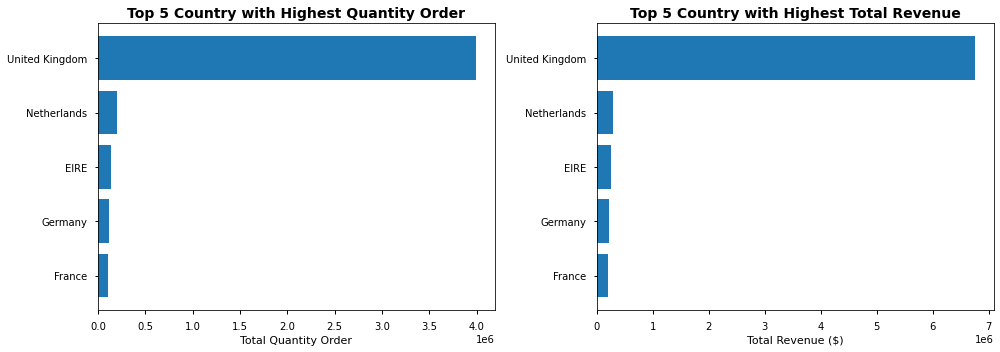

In [105]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].barh(y=top_5_qty_country.index, width=top_5_qty_country['Quantity'])
axes[0].set_xlabel('Total Quantity Order')
axes[0].set_title("Top 5 Country with Highest Quantity Order", fontsize=14, weight='bold')
axes[0].invert_yaxis()

axes[1].barh(y=top_5_rev_country.index, width=top_5_rev_country['TotalAmount'])
axes[1].set_xlabel('Total Revenue ($)')
axes[1].set_title("Top 5 Country with Highest Total Revenue", fontsize=14, weight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Top 5 Product by Country

In [106]:
# Grouping with Level
top_5_rev_product_by_country = (clean_df.groupby(['Country','Description'])[['Quantity','TotalAmount']].sum()\
                .groupby(level=0, as_index=False)\
                .apply(lambda x : x.nlargest(5, 'TotalAmount')).reset_index()\
                .sort_values(by='TotalAmount',ascending=False))

top_5_rev_product_by_country.drop(columns='level_0',inplace=True)

In [107]:
# Sorting Country with Highest Total Amount to Least
sorted_country = ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France',
       #'Australia', 'Switzerland', 'Spain', 'Belgium', 'Sweden', 'Japan',
       #'Norway', 'Portugal', 'Finland', 'Channel Islands', 'Denmark', 'Italy',
       #'Cyprus', 'Austria', 'Singapore', 'Poland', 'Israel', 'Greece',
       #'Iceland', 'Canada', 'Unspecified', 'Malta', 'United Arab Emirates',
       #'USA', 'Lebanon', 'Lithuania', 'European Community', 'Brazil', 'RSA',
       #'Czech Republic', 'Bahrain', 'Saudi Arabia'
       ]
# Filtering , only 5 top country
top_5_rev_product_by_country['Country'] = pd.Categorical(top_5_rev_product_by_country['Country'], categories=sorted_country, ordered=True)
top_5_rev_product_by_country = top_5_rev_product_by_country.sort_values(by=['Country']).reset_index(drop=True)

In [108]:
# Create Function
def select_country(country):
    selected_country = top_5_rev_product_by_country.loc[top_5_rev_product_by_country['Country'] == country]\
                      [['Description','Quantity','TotalAmount']]\
                      .sort_values(by='TotalAmount',ascending=False).reset_index(drop=True)
    
    print(f"Top 5 Product by Total Amount in : {country}")
    display(selected_country)
    print()

In [109]:
print(f"---- Top 5 Country with Highest Total Revenue by Product ---")
print(f"{'--' * 30}\n")
for c in sorted_country:
    select_country(c)

---- Top 5 Country with Highest Total Revenue by Product ---
------------------------------------------------------------

Top 5 Product by Total Amount in : United Kingdom


,Description,Quantity,TotalAmount
0,REGENCY CAKESTAND 3 TIER,8926,102871.15
1,WHITE HANGING HEART T-LIGHT HOLDER,32079,88260.85
2,JUMBO BAG RED RETROSPOT,40777,75236.43
3,PARTY BUNTING,13716,61893.48
4,ASSORTED COLOUR BIRD ORNAMENT,32580,52147.56



Top 5 Product by Total Amount in : Netherlands


,Description,Quantity,TotalAmount
0,RABBIT NIGHT LIGHT,4801,9568.48
1,ROUND SNACK BOXES SET OF4 WOODLAND,3132,7991.40
2,SPACEBOY LUNCH BOX,4528,7485.60
3,DOLLY GIRL LUNCH BOX,4132,6828.60
4,ROUND SNACK BOXES SET OF 4 FRUITS,1584,4039.20



Top 5 Product by Total Amount in : EIRE


,Description,Quantity,TotalAmount
0,REGENCY CAKESTAND 3 TIER,615,6936.15
1,CARRIAGE,97,4825.00
2,3 TIER CAKE TIN RED AND CREAM,235,3011.65
3,JAM MAKING SET WITH JARS,754,2967.50
4,RED RETROSPOT CAKE STAND,247,2704.65



Top 5 Product by Total Amount in : Germany


,Description,Quantity,TotalAmount
0,POSTAGE,1104,20821.00
1,REGENCY CAKESTAND 3 TIER,737,8257.35
2,ROUND SNACK BOXES SET OF4 WOODLAND,1206,3519.30
3,ROUND SNACK BOXES SET OF 4 FRUITS,661,1949.95
4,SPACEBOY LUNCH BOX,875,1629.45



Top 5 Product by Total Amount in : France


,Description,Quantity,TotalAmount
0,POSTAGE,803,15065.00
1,RABBIT NIGHT LIGHT,3999,7232.16
2,REGENCY CAKESTAND 3 TIER,220,2581.80
3,RED TOADSTOOL LED NIGHT LIGHT,1290,2128.50
4,PLASTERS IN TIN WOODLAND ANIMALS,1143,1866.75


#### Conclusion

- **Product Popularity:**\
The **"REGENCY CAKESTAND 3 TIER"** appears in the **top 5 products** list for multiple countries **(United Kingdom, EIRE, Germany, and France)**, indicating its wide popularity.

- **Country-Specific Preferences:**\
Each country has **unique preferences** for certain products. For example, the **"WHITE HANGING HEART T-LIGHT HOLDER"** is **highly popular** in the **United Kingdom**, while the **"RABBIT NIGHT LIGHT"** is a top product in the **Netherlands and France**.

- **Revenue Contribution:**\
High-revenue products like **"POSTAGE"** in **Germany and France** contribute significantly to the overall revenue in these countries.

**Recommendations :**
- **Focus on Best-Selling Products:**\
Continue to **prioritize and promote** best-selling products like the **"REGENCY CAKESTAND 3 TIER"** across multiple markets to drive sales.

- **Tailored Marketing:**\
Develop tailored marketing strategies for each country based on their specific product preferences to maximize customer engagement and sales.

- **Monitor Product Performance:**\
Continuously monitor the performance of these top products to identify emerging trends and adjust inventory and marketing strategies accordingly.

### Products Analysis

#### `Total Amount`

In [110]:
# Highest revenue per product
# Filtering
highest_revenue_product = clean_df.loc[clean_df['Quantity'] > 0]
highest_revenue_product = highest_revenue_product.groupby(['Description'])[['TotalAmount']].sum().sort_values(ascending=False,by='TotalAmount')

In [111]:
# Top 20
top_20_highest_revenue_product = highest_revenue_product.head(20)
top_20_highest_revenue_product

,TotalAmount
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68785.23
ASSORTED COLOUR BIRD ORNAMENT,56413.03
Manual,53419.93


In [112]:
top_20_lowest_revenue_product = highest_revenue_product.tail(30).sort_values(by='TotalAmount')
top_20_lowest_revenue_product.head(5)

,TotalAmount
Description,
PADS TO MATCH ALL CUSHIONS,0.00
HEN HOUSE W CHICK IN NEST,0.42
SET 12 COLOURING PENCILS DOILEY,0.65
VINTAGE BLUE TINSEL REEL,0.84
PURPLE FRANGIPANI HAIRCLIP,0.85


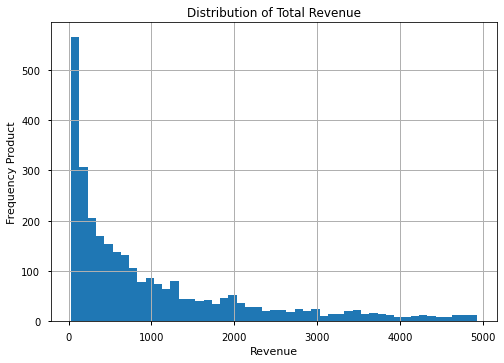

In [113]:
# lowest revenue freq per product
highest_revenue_product.hist(bins=range(30,5000,100))
plt.xlabel('Revenue')
plt.ylabel('Frequency Product')
plt.title('Distribution of Total Revenue')
plt.show()

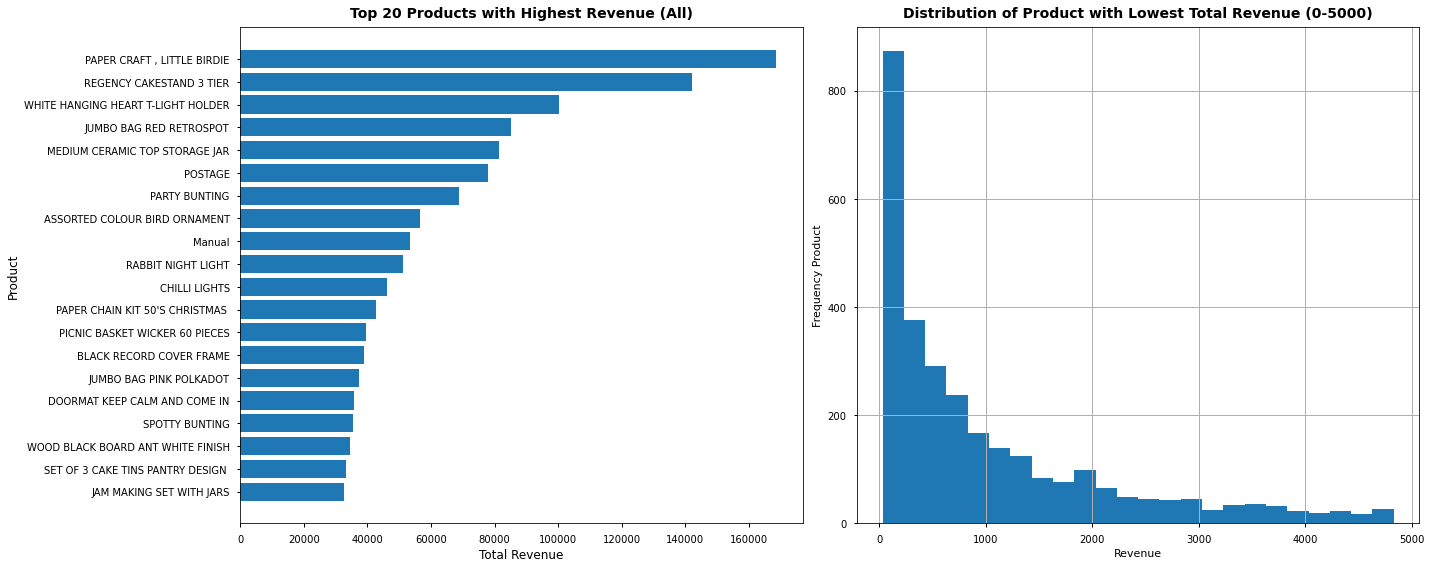

In [114]:
fig, axes = plt.subplots(1,2, figsize=(20,8))

axes[0].barh(y=top_20_highest_revenue_product.index, width=top_20_highest_revenue_product['TotalAmount'])
axes[0].set_title('Top 20 Products with Highest Revenue (All)', fontsize=14, weight='bold', pad=10)
axes[0].set_xlabel("Total Revenue", fontsize=12)
axes[0].set_ylabel("Product", fontsize=12)
axes[0].invert_yaxis() 

highest_revenue_product.hist(bins=range(30,5000,200),ax=axes[1])
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Frequency Product')
axes[1].set_title('Distribution of Product with Lowest Total Revenue (0-5000)',fontsize=14, weight='bold', pad=10)

plt.tight_layout()
plt.show()


#### Conclusion

- **Top Performer:**\
The **"PAPER CRAFT, LITTLE BIRDIE"** product is the highest revenue generator with a total amount of `$168,469.60`.

- **Popular Products:**\
Products like **"REGENCY CAKESTAND 3 TIER"** and **"WHITE HANGING HEART T-LIGHT HOLDER"** also show strong performance, indicating their popularity among customers.

- **Diverse Product Range:**\
The **top 20** highest revenue products encompass a diverse range of items, from decorative items like **"JUMBO BAG RED RETROSPOT"** to practical items like **"PICNIC BASKET WICKER 60 PIECES"**.

#### `Total Quantity`

In [115]:
# Highest Qty per product
# Filtering
highest_qty_product = clean_df.loc[clean_df['Quantity'] > 0]
highest_qty_product = highest_qty_product.groupby(['Description'])[['Quantity']].sum().sort_values(ascending=False,by='Quantity')

In [116]:
# Top 20
top_20_highest_qty_product = highest_qty_product.head(20)
top_20_highest_qty_product

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


In [117]:
# top 20 lowest
#highest_qty_product.loc[~highest_qty_product.index.isin(['Manual','CRUK Commission','Discount'])]
top_20_lowest_qty_product = highest_qty_product.tail(10).sort_values(by='Quantity')
top_20_lowest_qty_product.head()

,Quantity
Description,
BLACK DROP EARRINGS W LONG BEADS,1
FIRE POLISHED GLASS BRACELET BLACK,1
SET/6 IVORY BIRD T-LIGHT CANDLES,1
PURPLE FRANGIPANI HAIRCLIP,1
CAKE STAND LACE WHITE,1


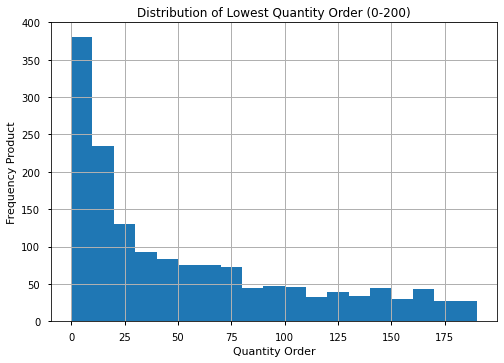

In [118]:
highest_qty_product.hist(bins=range(0,200,10))
plt.xlabel('Quantity Order')
plt.ylabel('Frequency Product')
plt.title('Distribution of Lowest Quantity Order (0-200)')
plt.show()

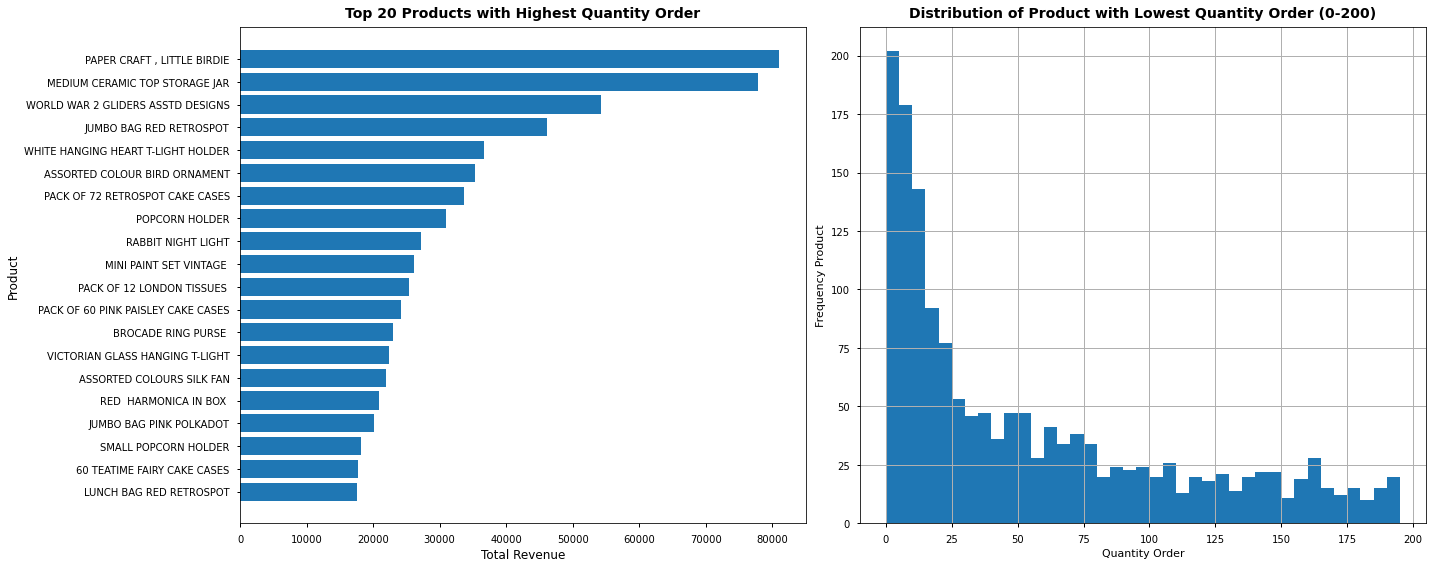

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

axes[0].barh(y=top_20_highest_qty_product.index, width=top_20_highest_qty_product['Quantity'])
axes[0].set_title('Top 20 Products with Highest Quantity Order', fontsize=14, weight='bold', pad=10)
axes[0].set_xlabel("Total Revenue", fontsize=12)
axes[0].set_ylabel("Product", fontsize=12)
axes[0].invert_yaxis() 

highest_qty_product.hist(bins=range(0,200,5),ax=axes[1])
axes[1].set_xlabel('Quantity Order')
axes[1].set_ylabel('Frequency Product')
axes[1].set_title('Distribution of Product with Lowest Quantity Order (0-200)',fontsize=14, weight='bold', pad=10)

plt.tight_layout()
plt.show()


#### Conclusion

- **Top Performer:**\
The **"PAPER CRAFT, LITTLE BIRDIE"** product is the highest quantity product with a total quantity of `80,995` **units sold**.

- **Popular Products:**\
Products like **"MEDIUM CERAMIC TOP STORAGE JAR"** and **"WORLD WAR 2 GLIDERS ASSTD DESIGNS"** also show strong performance in terms of quantity sold.

- **Diverse Product Range:**\
The **top 20** highest quantity products encompass a diverse range of items, from decorative items like **"WHITE HANGING HEART T-LIGHT HOLDER"** to practical items like **"PACK OF 72 RETROSPOT CAKE CASES"**.

### Top Product by Total Amount

In [120]:
clean_df['Description'].nunique()

3896

In [121]:
product_name = list(clean_df['Description'].unique())
product_name[:10]

['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'ASSORTED COLOUR BIRD ORNAMENT']

In [122]:
# Negative Quantity 
negative_qty = clean_df.loc[clean_df['Quantity'] < 0]
positive_qty = clean_df.loc[clean_df['Quantity'] > 0]

In [123]:
positive_product_20 = positive_qty.groupby(['Description'])[['Quantity','TotalAmount']].mean().sort_values(by='TotalAmount',ascending=False).head(20)
negative_product_20 = negative_qty.groupby(['Description'])[['Quantity','TotalAmount']].mean().sort_values(by='TotalAmount').head(20)

In [124]:
display(positive_product_20)
display(negative_product_20)

,Quantity,TotalAmount
Description,,
"PAPER CRAFT , LITTLE BIRDIE",80995.00,168469.60
PICNIC BASKET WICKER 60 PIECES,30.50,19809.75
TEA TIME TEA TOWELS,1300.00,3022.50
MISELTOE HEART WREATH CREAM,240.00,996.00
DOTCOM POSTAGE,1.00,744.15
SET/5 RED SPOTTY LID GLASS BOWLS,288.00,734.40
HALL CABINET WITH 3 DRAWERS,18.75,625.88
POTTING SHED CANDLE CITRONELLA,201.00,625.41
WEEKEND BAG VINTAGE ROSE PAISLEY,69.00,527.85


,Quantity,TotalAmount
Description,,
"PAPER CRAFT , LITTLE BIRDIE",-80995.00,-168469.60
MEDIUM CERAMIC TOP STORAGE JAR,-7449.40,-7747.96
FAIRY CAKE FLANNEL ASSORTED COLOUR,-1050.00,-2197.14
DOORMAT FAIRY CAKE,-224.67,-1518.30
PANTRY CHOPPING BOARD,-157.67,-800.51
VINTAGE BILLBOARD TEA MUG,-701.00,-743.06
Manual,-22.83,-640.95
OFFICE MUG WARMER PINK,-250.00,-637.50
FELTCRAFT DOLL MOLLY,-241.17,-585.44


#### Conclusion

- **Top Positive Performer:**\
The **"PAPER CRAFT, LITTLE BIRDIE"** product **stands out** as the **top positive performer** with the **highest quantity** sold `(80,995)` and the **highest total amount** `($168,469.60)`.

- **Top Negative Performer:**\
The same product, **"PAPER CRAFT, LITTLE BIRDIE,"** also appears as the **top negative performer** with the **highest negative quantity** `(-80,995)` and the **highest negative total amount** `(-$168,469.60)`.

- **Diverse Product Range:**\
Both **positive and negative** performing products encompass a diverse range of items, from decorative items like **"TEA TIME TEA TOWELS"** to practical items like **"MEDIUM CERAMIC TOP STORAGE JAR"**.

**Recommendations :**
- **Focus on Positive Performers:**\
Continue to prioritize and promote high-performing products like **"PAPER CRAFT, LITTLE BIRDIE"** to drive sales and maximize revenue.

- **Investigate Negative Performers:**\
Conduct a detailed analysis to understand the reasons behind the negative performance of certain products, such as **"MEDIUM CERAMIC TOP STORAGE JAR,"** and develop strategies to address these issues.

- **Monitor Product Performance:**\
Continuously monitor the performance of both positive and negative products to identify emerging trends and adjust inventory and marketing strategies accordingly.


This analysis provides a clear understanding of the **top 20 products** with **positive and negative** performance and highlights the importance of leveraging these insights to make data-driven decisions. If you have any questions or need further assistance, please feel free to reach out.

#### For the future, there are still many steps that can be done for Deeper Analysis and better Understanding of Data. adding other features or others such as creating a Machine Learning model to Predict future Sales, but this time it's enough for now, Thank You.

### Ikhsan Kamal
**Instagram : iamikhsank [here](https://www.instagram.com/iamikhsank).**\
**LinkedIn   : Ikhsan Kamal [here](www.linkedin.com/in/ikhsankamal).**